In [504]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm, probplot, skew
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [505]:
#read the data
file_path = '/Users/suryapratapsingh/Downloads/train.csv'
df = pd.read_csv(file_path)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [506]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling Null & Missing values

In [507]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [508]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False), columns = ['Null %'])
null.index.name = 'Features'
null.head()

Null %
Features           
PoolQC        99.52
MiscFeature   96.30
Alley         93.77
Fence         80.75
MasVnrType    59.73

In [509]:
#dataframe with features having null values
null_df = null[null['Null %']>0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
MasVnrType     59.73
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
Electrical      0.07

- here, we can drop the PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu

In [510]:
df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace = True)

In [511]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'S

#### Indentifying Categorical & Numerical Columns

In [512]:
#Categorical Columns
df.select_dtypes(include = 'object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [513]:
#Numerical Columns
df.select_dtypes(exclude = 'object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [514]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [515]:
#### Running the null identifier code again to observe patterns in the columns 
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False), columns = ['Null %'])
null.index.name = 'Features'
null_df = null[null['Null %']>1].reset_index()
null_df

Features  Null %
0    LotFrontage   17.74
1    GarageYrBlt    5.55
2     GarageCond    5.55
3     GarageType    5.55
4   GarageFinish    5.55
5     GarageQual    5.55
6   BsmtFinType2    2.60
7   BsmtExposure    2.60
8   BsmtFinType1    2.53
9       BsmtCond    2.53
10      BsmtQual    2.53

In [516]:
for i in null_df['Features']:
    print(df[i].value_counts())
    print('\n')

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [517]:
#For Numerical Columns: we observe that for LotFrontage & GarageYrBlt there are outliers and hence the missing values can be replaced with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [518]:
#For categorical columns we will replace the null values with median
for col in ['GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']:
    df[col] = df[col].fillna(df[col].mode()[0])

#### running the null code again to check for null values

In [519]:
#### Running the null identifier code again to observe patterns in the columns 
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False), columns = ['Null %'])
null.index.name = 'Features'
null_df = null[null['Null %']>0].reset_index()
null_df

Empty DataFrame
Columns: [Features, Null %]
Index: []

In [520]:
df.isnull().values.any()

False

In [521]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

- from the above, it is clear that we have no null values in our data

In [522]:
#checking shape of the data
df.shape

(1460, 75)

In [523]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [524]:
#observing columns to see if they are filled with single values only
print(df['PoolArea'].value_counts())
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64


- the three columns described above can be dropped as they contain values of single type which should not be case for these columns as per their description and can be removed from the data since they will not add any extra information

In [525]:
df.drop(columns = ['PoolArea', 'MoSold', '3SsnPorch'], inplace = True)

In [526]:
df.shape

(1460, 72)

In [527]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MiscVal       YrSold      SalePrice
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     43.489041  2007.815753  180921.195890
std     421.610009    42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415    496.123024     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000      0.000000  2006.000000   34900.000000
25%     365.750000    20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000      0.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000      0.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000      0.000000  2009.000000  214000.000000
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.00000

# Exploratory Data Analysis

## Handling Outliers

In [528]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0            0        0    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0            0        0    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0            0        0    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1     Detchd       1998.0          Unf           3         642         TA         TA          Y           0           35            272        

In [529]:
#Numerical Columns
cols = [i for i in df.select_dtypes(exclude = 'object').columns if i != 'Id']
Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [530]:
#checking the data after the outliers have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1291 non-null   int64  
 1   MSSubClass     1291 non-null   int64  
 2   MSZoning       1291 non-null   object 
 3   LotFrontage    1291 non-null   float64
 4   LotArea        1291 non-null   int64  
 5   Street         1291 non-null   object 
 6   LotShape       1291 non-null   object 
 7   LandContour    1291 non-null   object 
 8   Utilities      1291 non-null   object 
 9   LotConfig      1291 non-null   object 
 10  LandSlope      1291 non-null   object 
 11  Neighborhood   1291 non-null   object 
 12  Condition1     1291 non-null   object 
 13  Condition2     1291 non-null   object 
 14  BldgType       1291 non-null   object 
 15  HouseStyle     1291 non-null   object 
 16  OverallQual    1291 non-null   int64  
 17  OverallCond    1291 non-null   int64  
 18  YearBuilt    

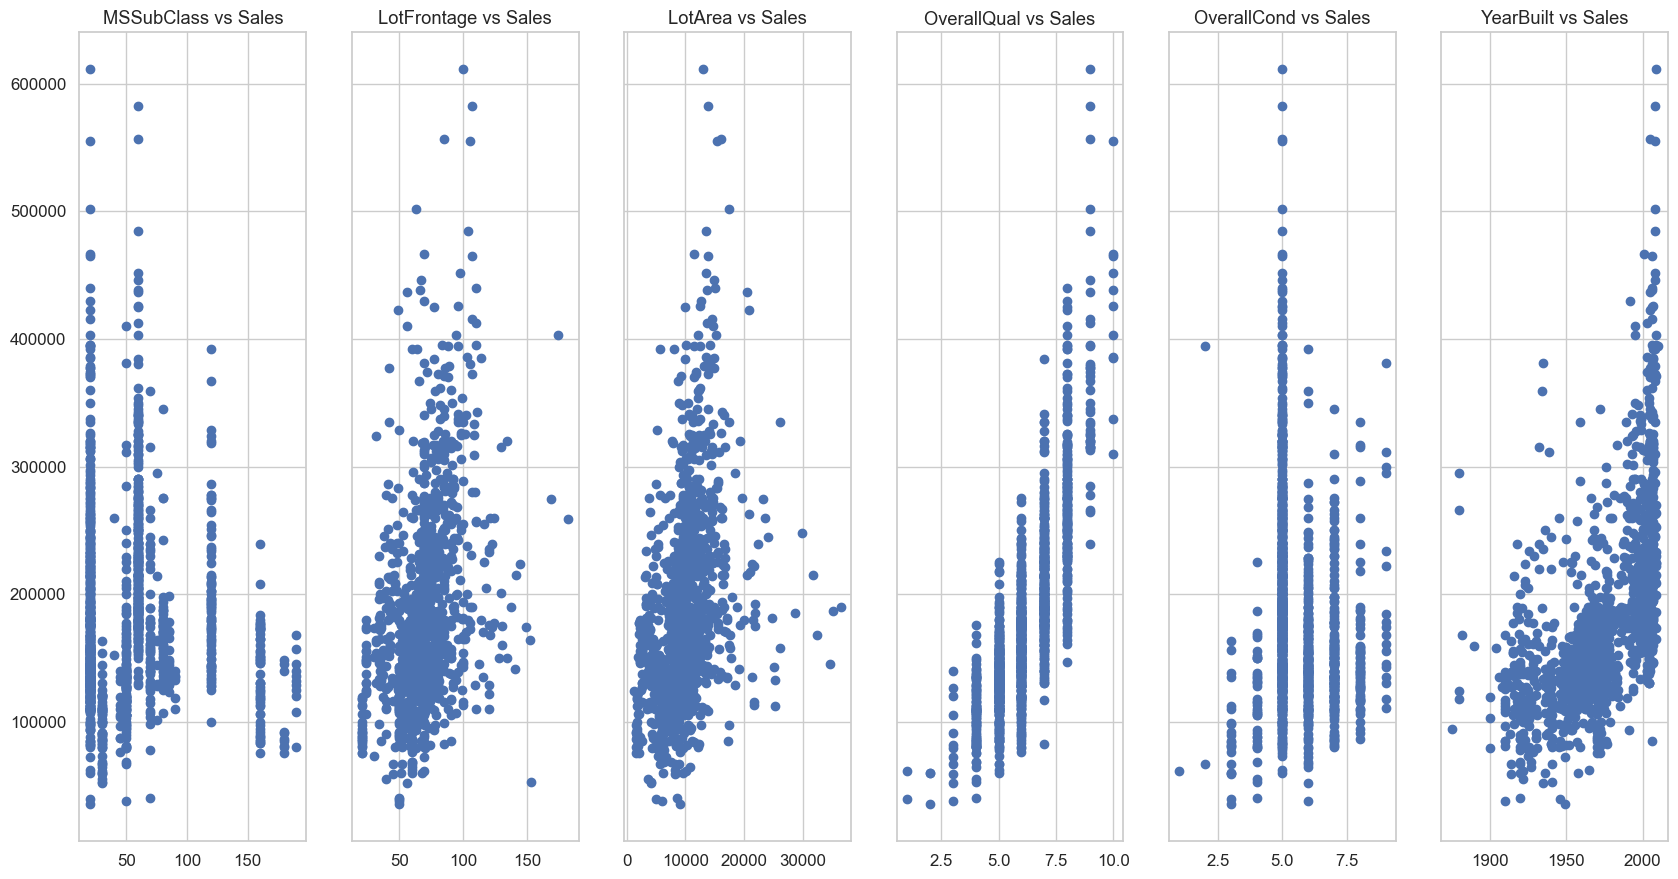

In [531]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(df['LotFrontage'], df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(df['LotArea'], df['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(df['OverallQual'], df['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(df['OverallCond'], df['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(df['YearBuilt'], df['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

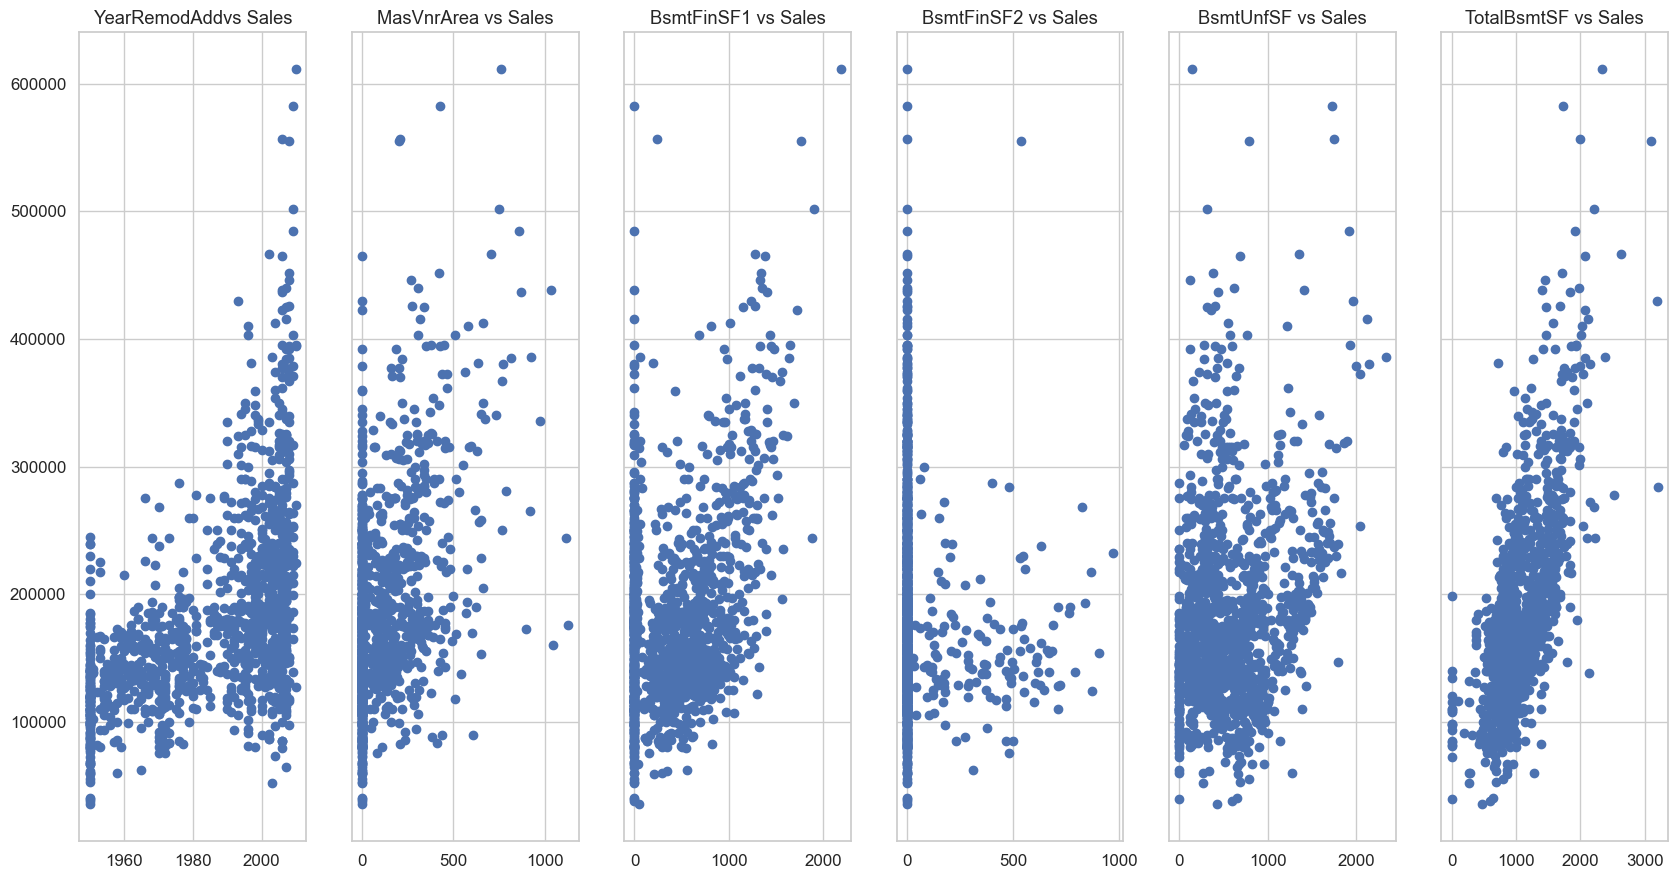

In [532]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(df['YearRemodAdd'], df['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(df['MasVnrArea'], df['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(df['TotalBsmtSF'], df['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

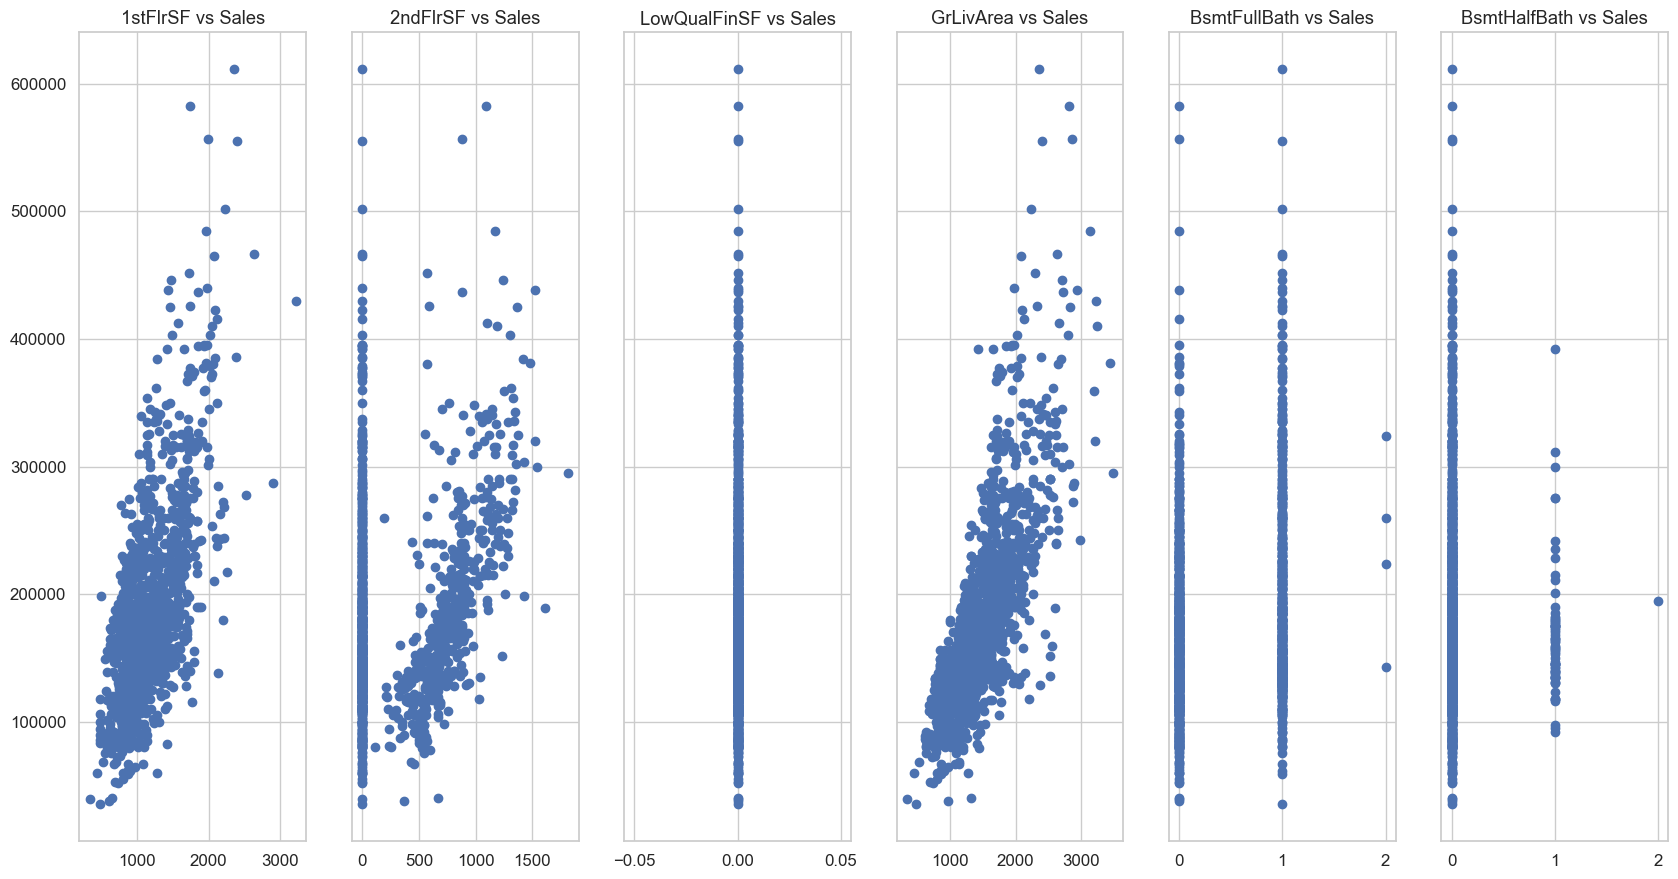

In [533]:
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(df['1stFlrSF'], df['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

ndFlrSF= ax[1].scatter(df['2ndFlrSF'], df['SalePrice'])
ndFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(df['LowQualFinSF'], df['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(df['GrLivArea'], df['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(df['BsmtFullBath'], df['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(df['BsmtHalfBath'], df['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

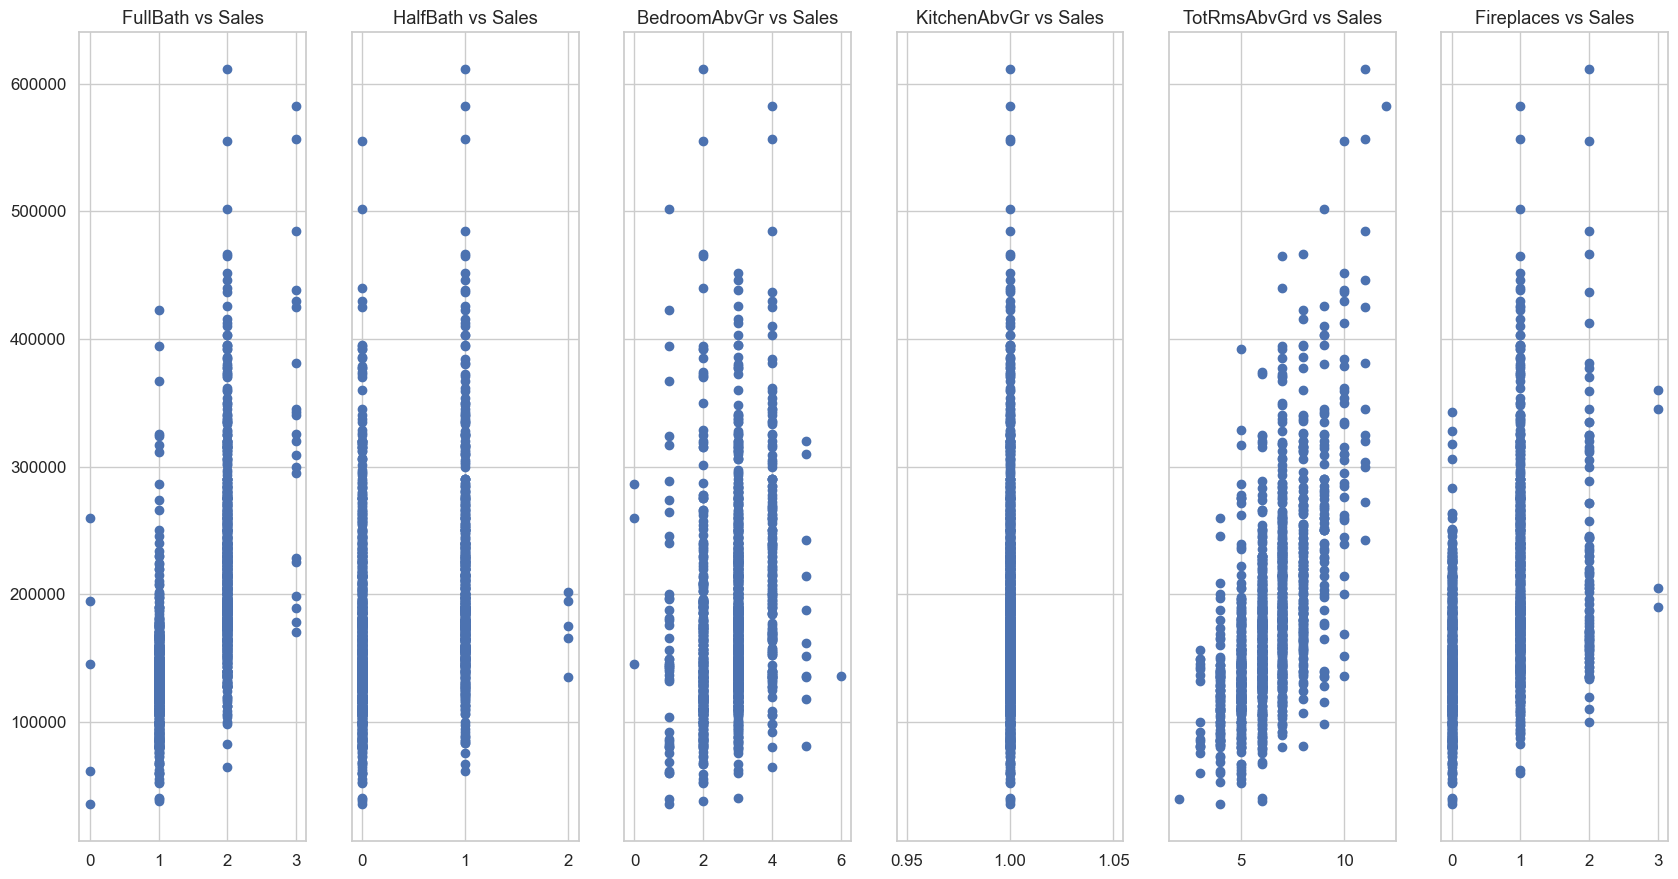

In [534]:
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(df['FullBath'], df['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(df['HalfBath'], df['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(df['BedroomAbvGr'], df['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(df['KitchenAbvGr'], df['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(df['TotRmsAbvGrd'], df['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(df['Fireplaces'], df['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

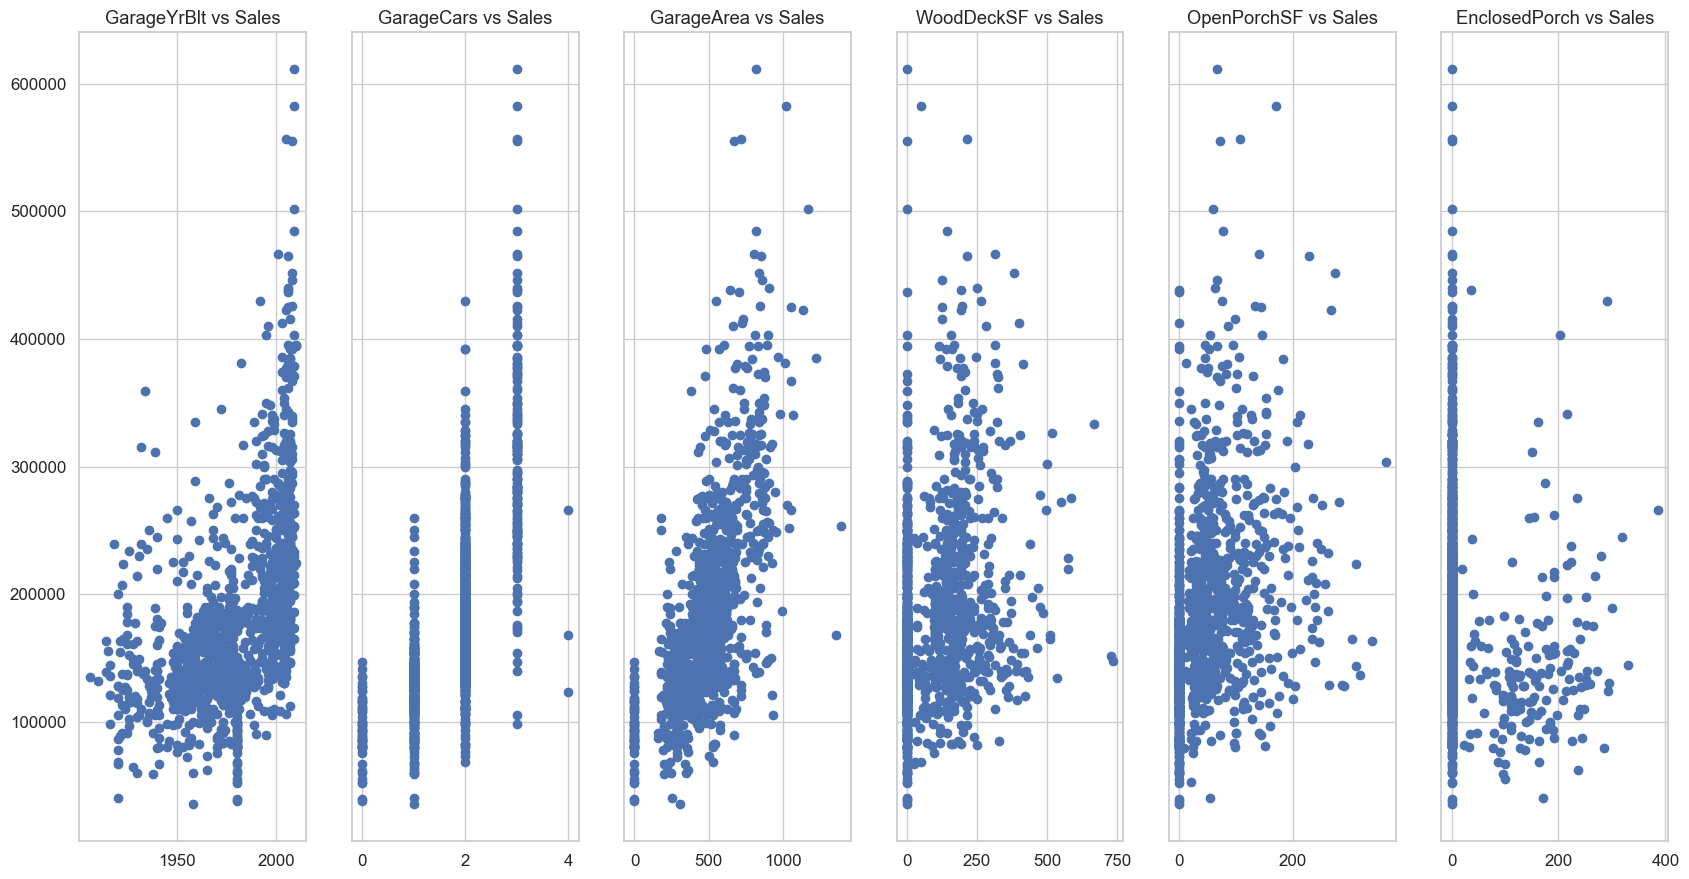

In [535]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(df['GarageYrBlt'], df['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(df['GarageCars'], df['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(df['GarageArea'], df['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(df['WoodDeckSF'], df['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(df['OpenPorchSF'], df['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(df['EnclosedPorch'], df['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

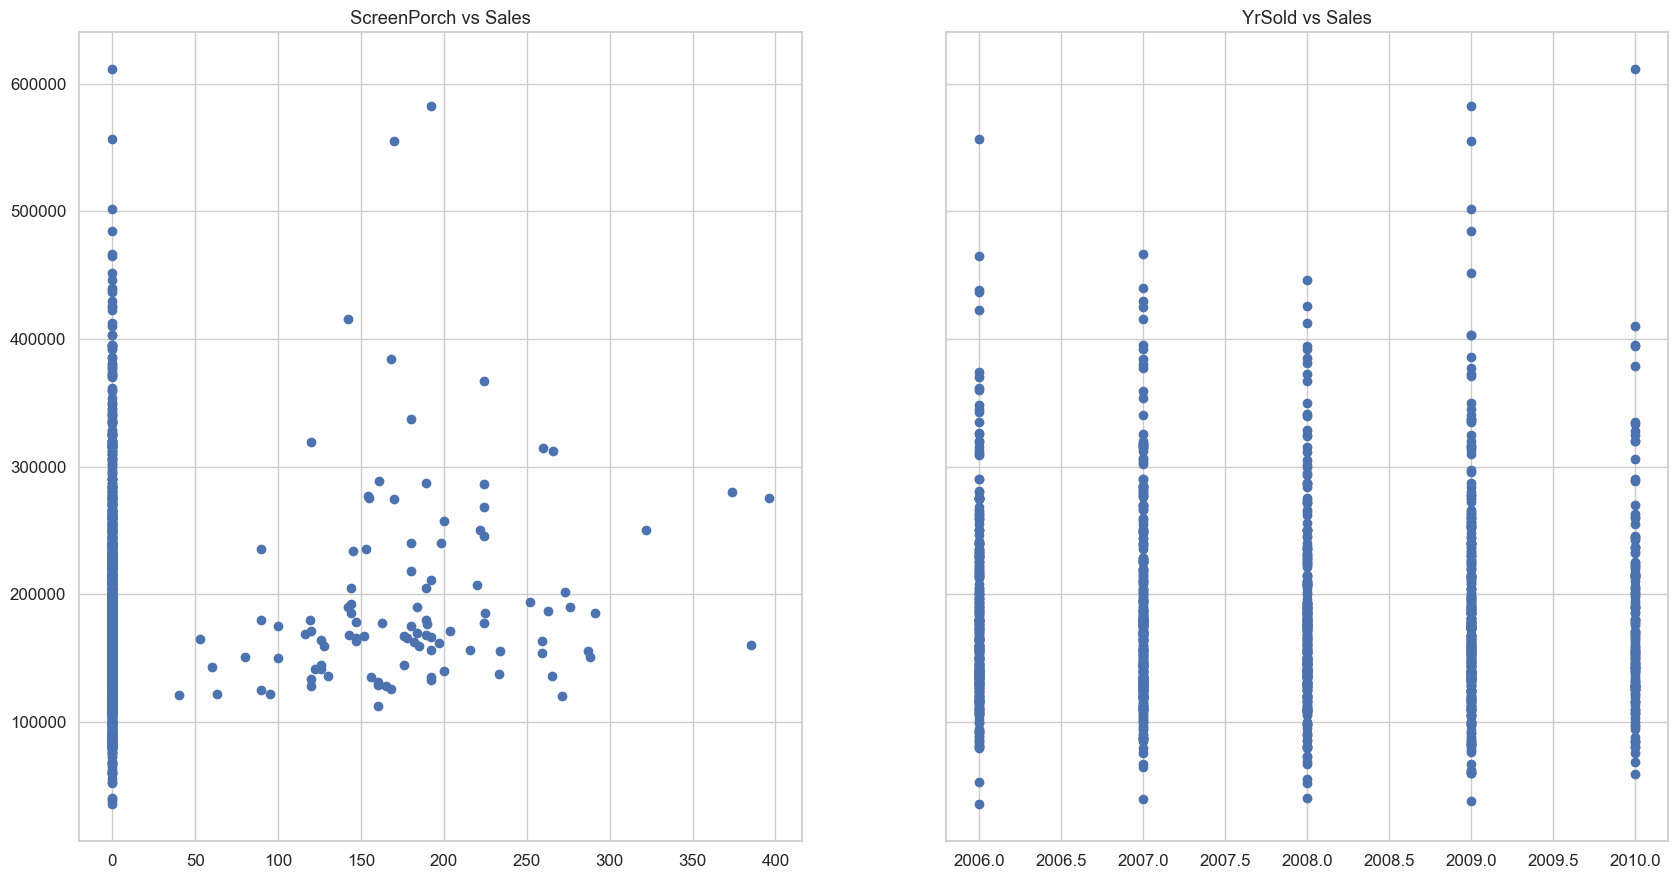

In [536]:
fig, ax = plt.subplots(ncols=2, sharey=True)


ScreenPorch= ax[0].scatter(df['ScreenPorch'], df['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[0].set_title('ScreenPorch vs Sales')

YrSold = ax[1].scatter(df['YrSold'], df['SalePrice'])
YrSold.set_label("YrSold")
ax[1].set_title('YrSold vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [537]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

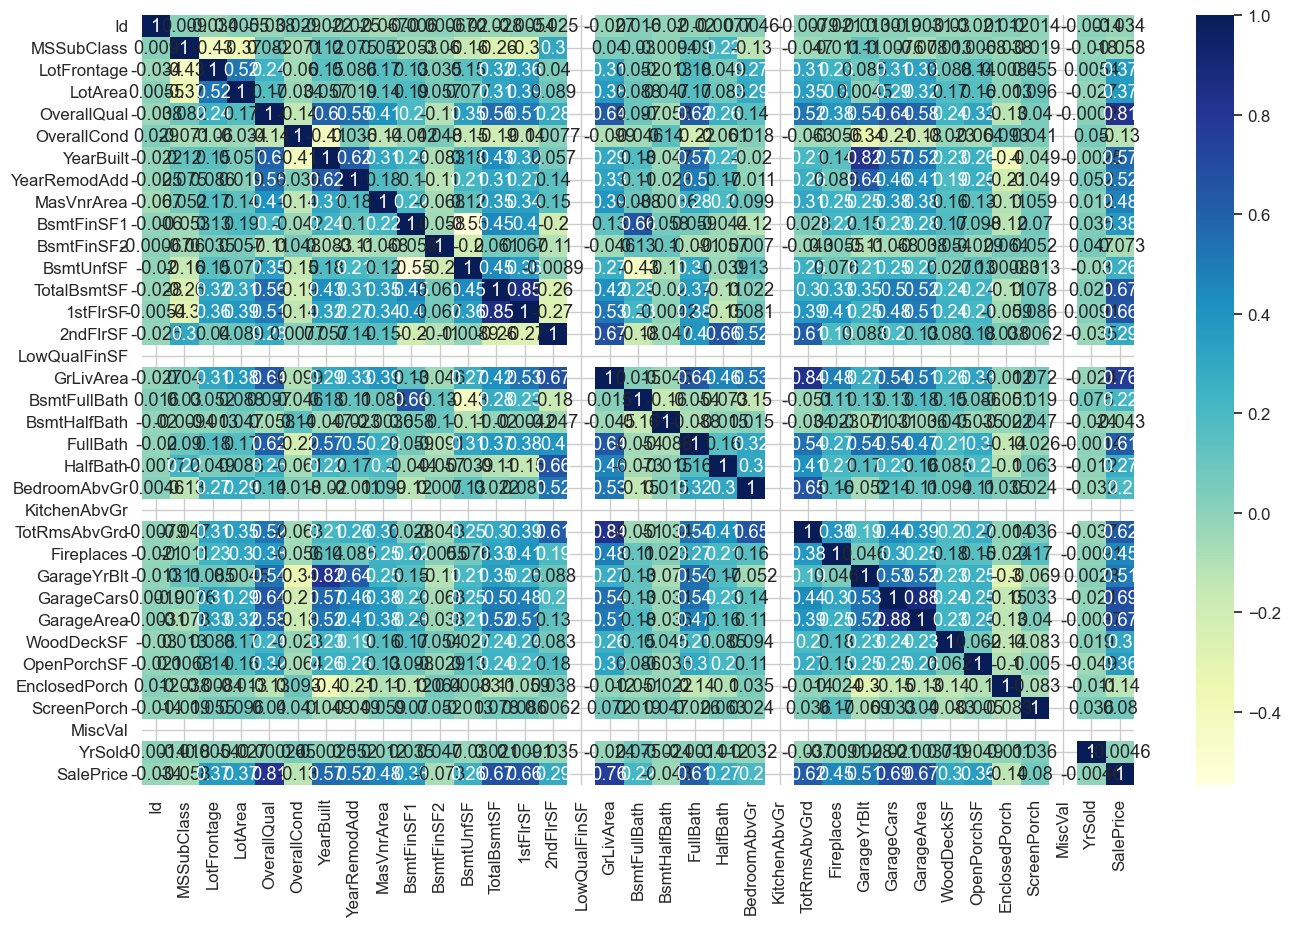

In [538]:
# Let's check the correlation coefficients to see which variables are highly correlated
num_col = df.select_dtypes(exclude='object').columns
df_num = df[num_col]
plt.figure(figsize = (16, 10))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

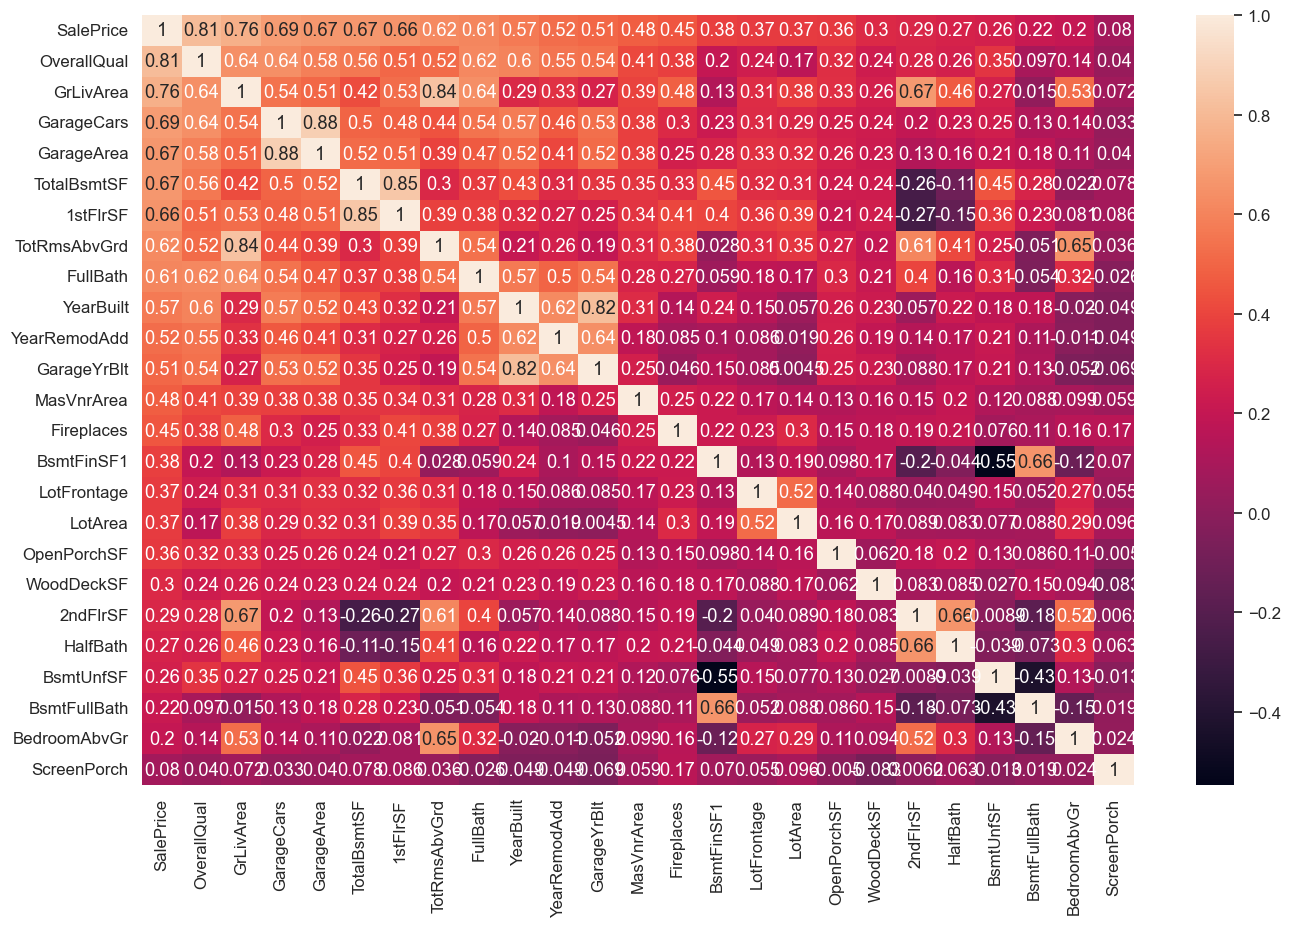

In [539]:
#plotting the heatmap for 25 most correlated columns with SalePrice
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = df_num.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(df_num[cols].corr(),annot=True)
plt.show()

### Inferences: Based on the correlation we can make few following interpretions

- SalePrice is very high positively correlated to the Overall Quality(0.79)
- SalePrice is very high positively correlated to the 1stFlrSF (0.61)
- SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
- SalePrice is very high positively correlated to the GrLivArea (0.71)
- SalePrice is very high positively correlated to the FullBath(0.58)
- SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
- SalePrice is very high positively correlated to the GarageCars(0.64)
- SalePrice is very high positively correlated to the GarageAre(0.62)

### Bivariate analysis of these top 9 correlated variables with saleprice using pairplot

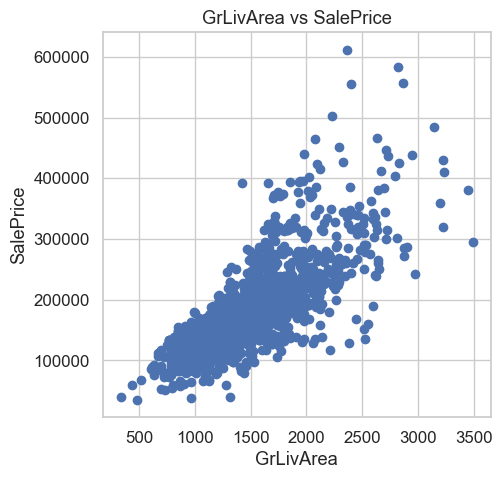

In [540]:
plt.figure(figsize = (5,5)) 
plt.scatter(df.GrLivArea, df.SalePrice)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

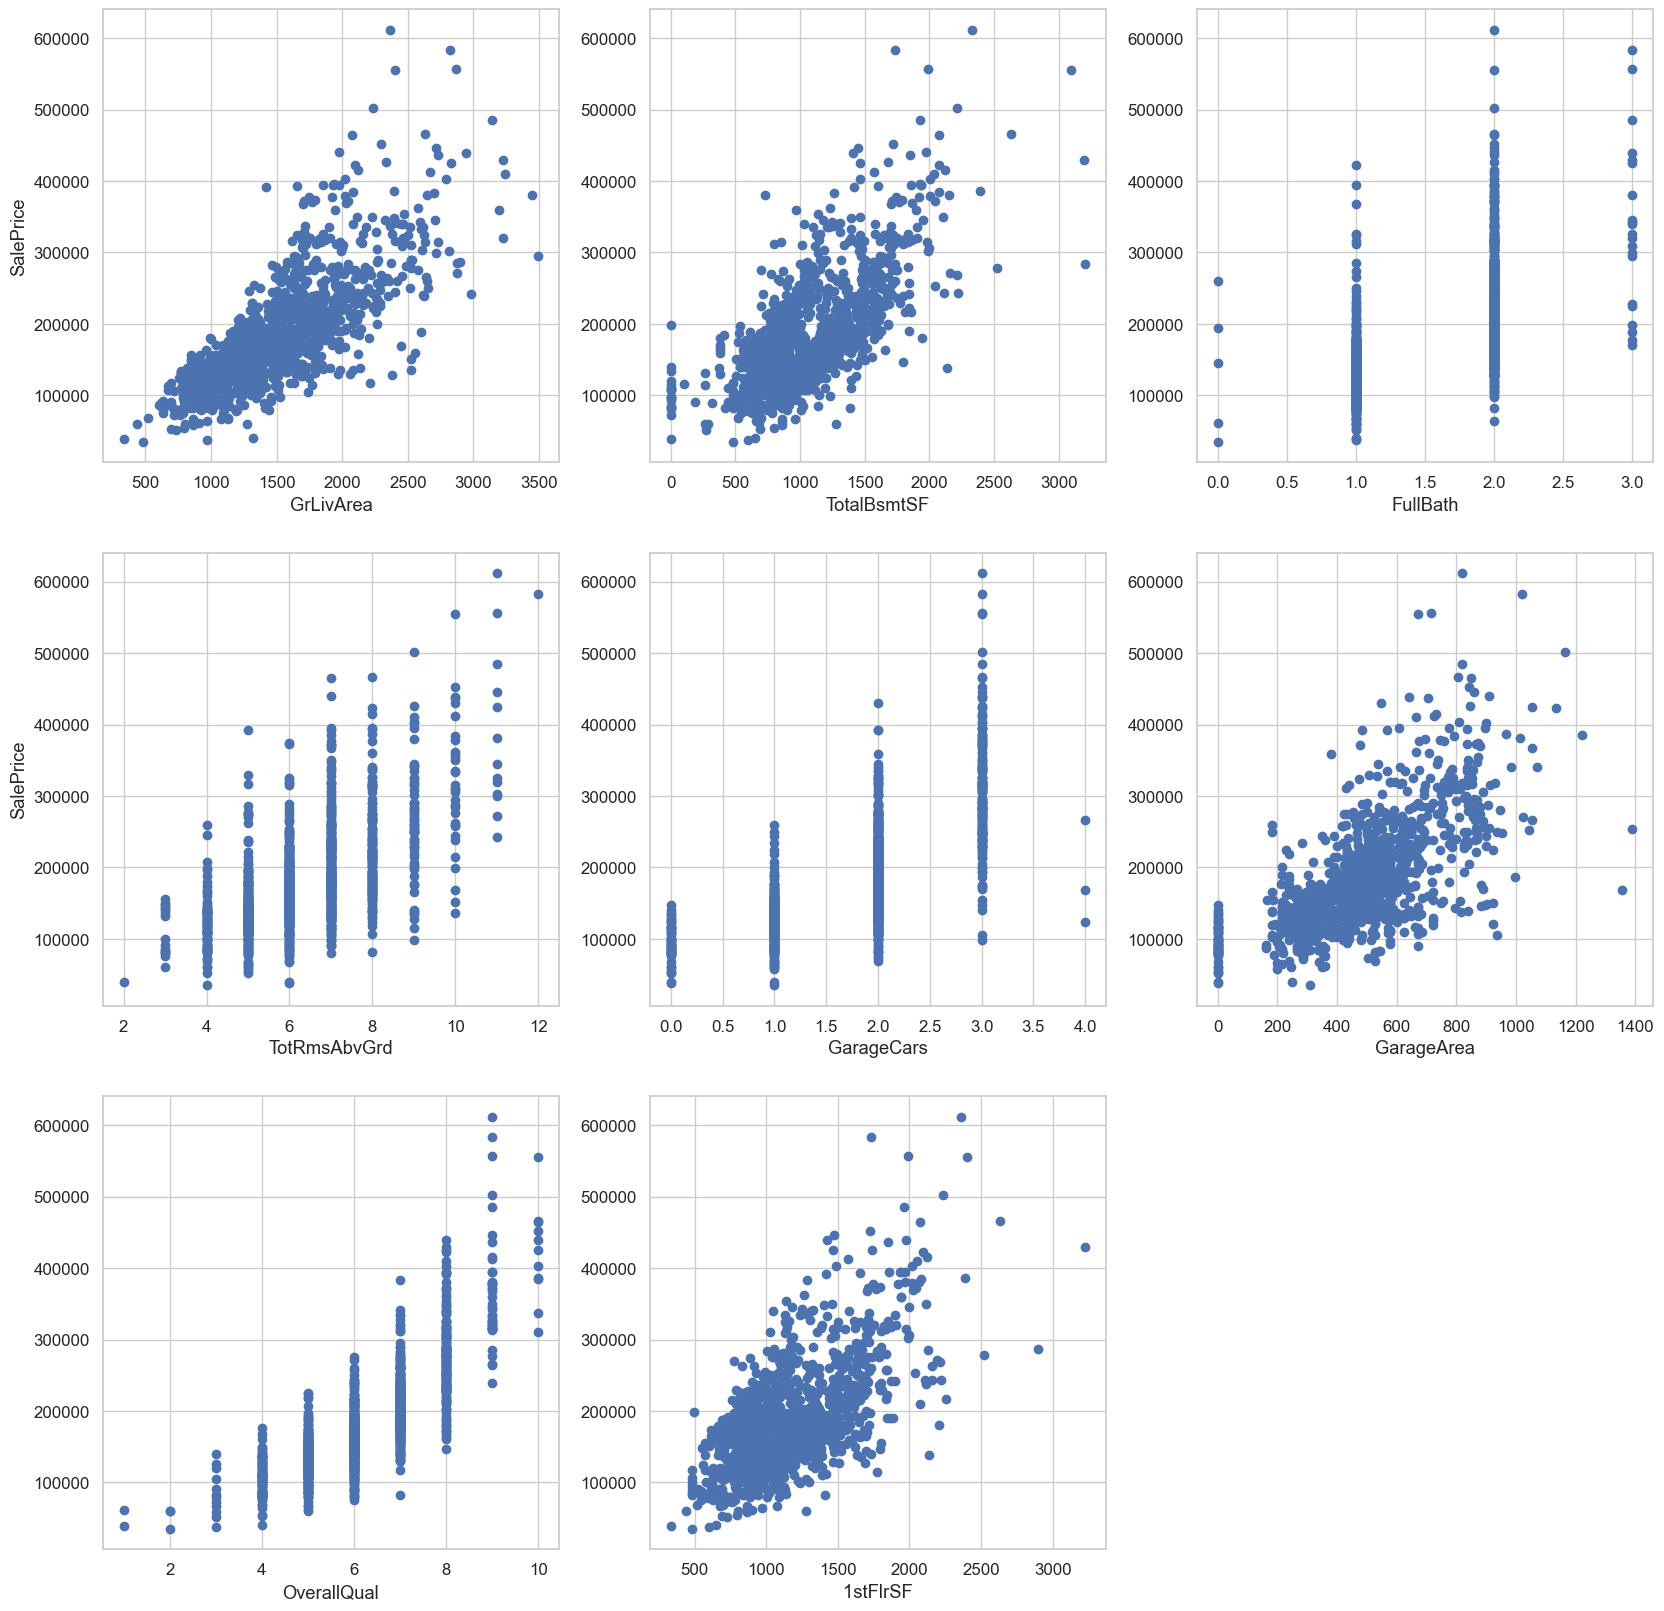

In [541]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(df.GrLivArea, df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(df.TotalBsmtSF, df.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(df.FullBath, df.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(df.TotRmsAbvGrd, df.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(df.GarageCars, df.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(df.GarageArea, df.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(df.OverallQual, df.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,8)
plt.scatter(df['1stFlrSF'], df.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

- We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
- We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics.

### EDA FOR few categorical columns- the columns which might be useful predicting the sale price

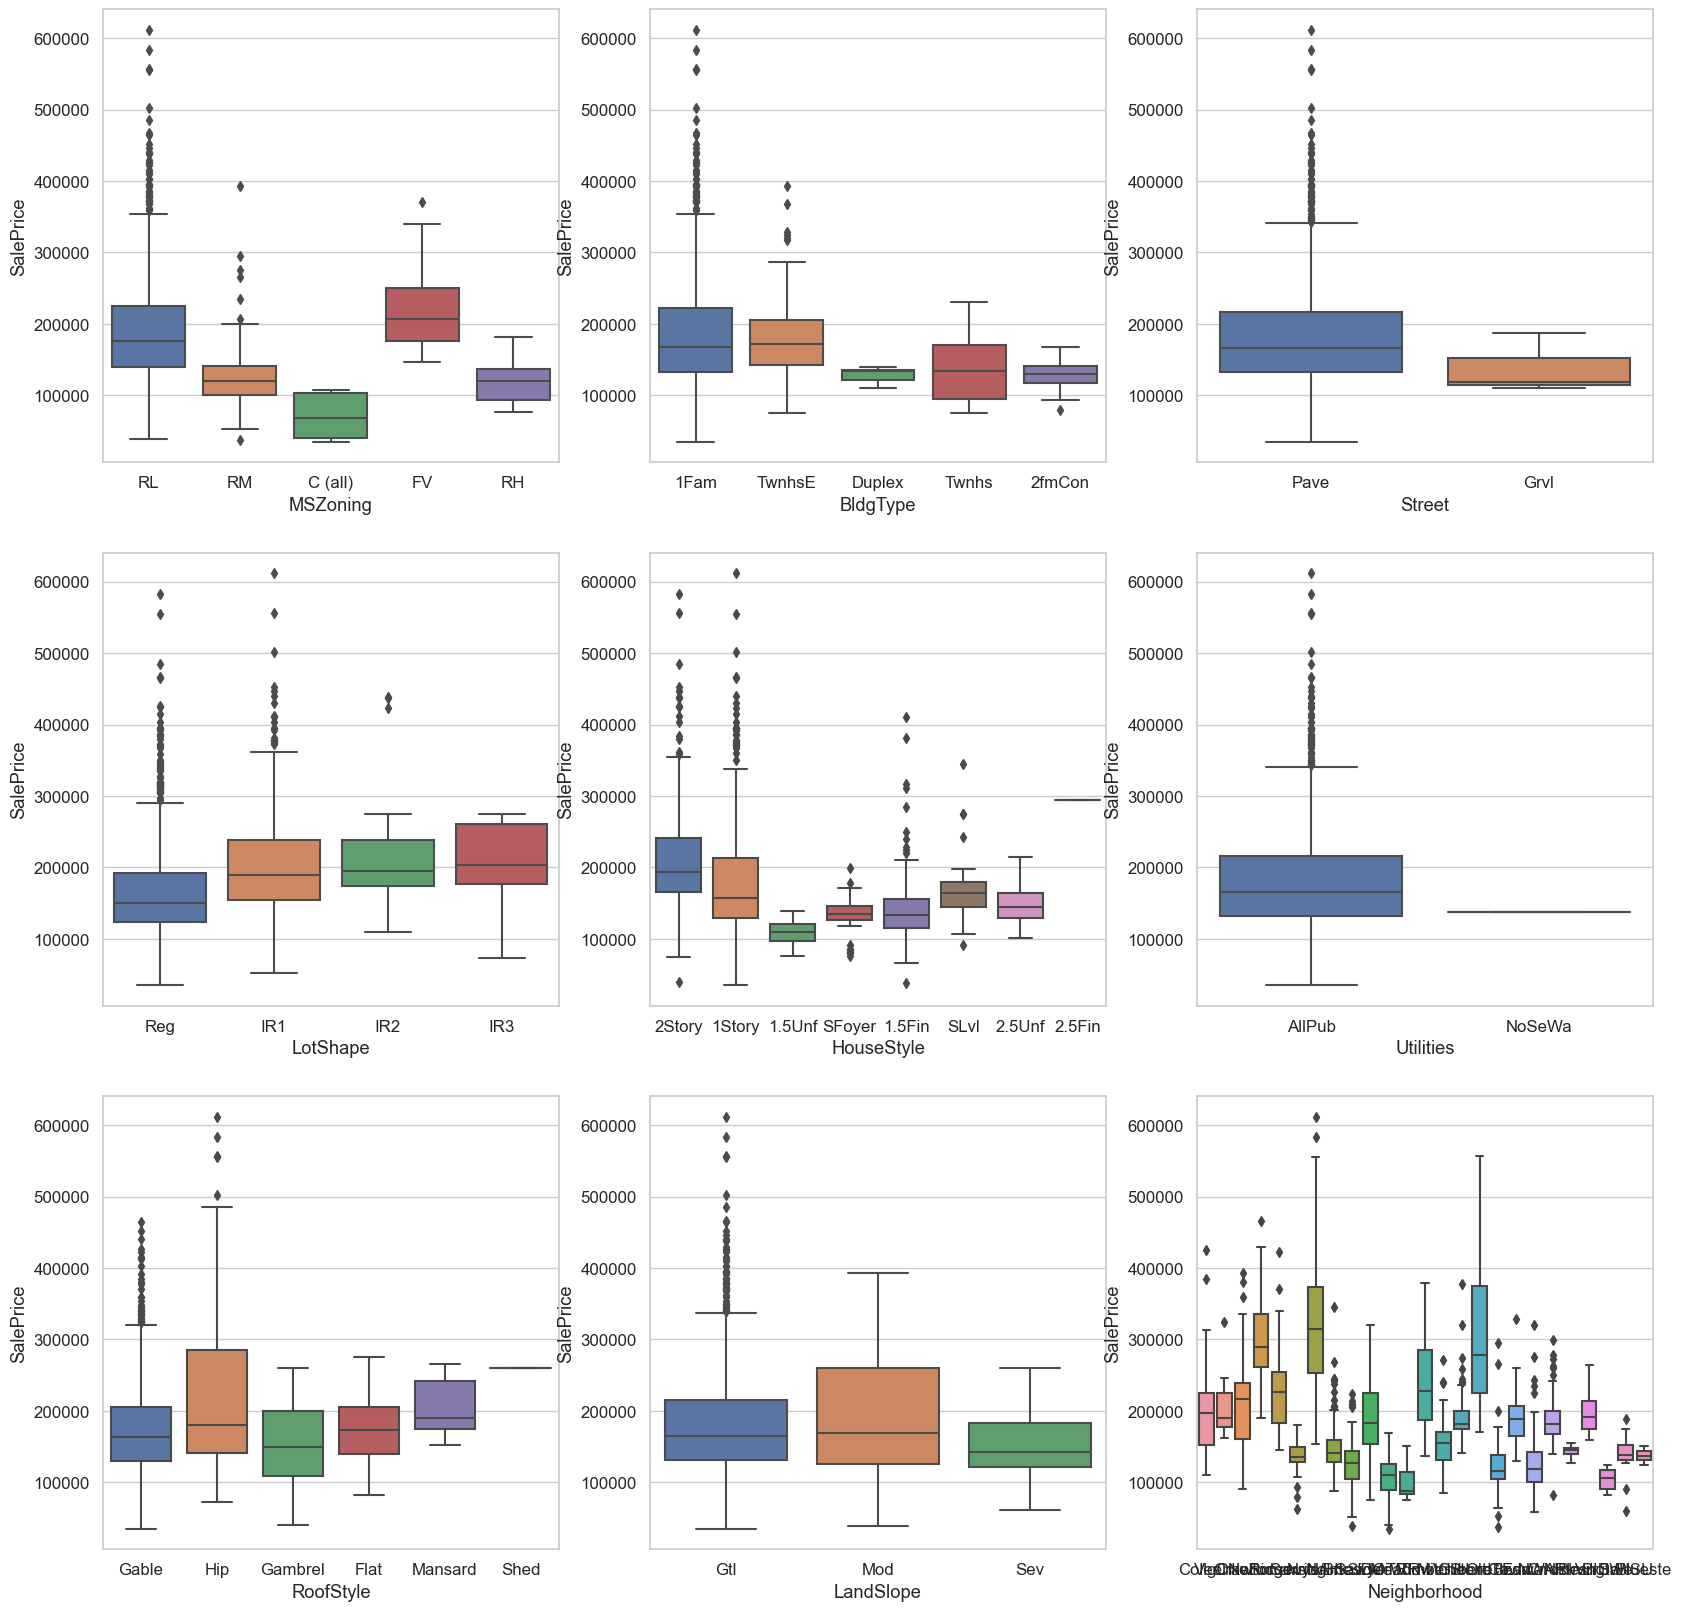

In [542]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=df)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=df)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=df)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=df)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=df)
plt.show()

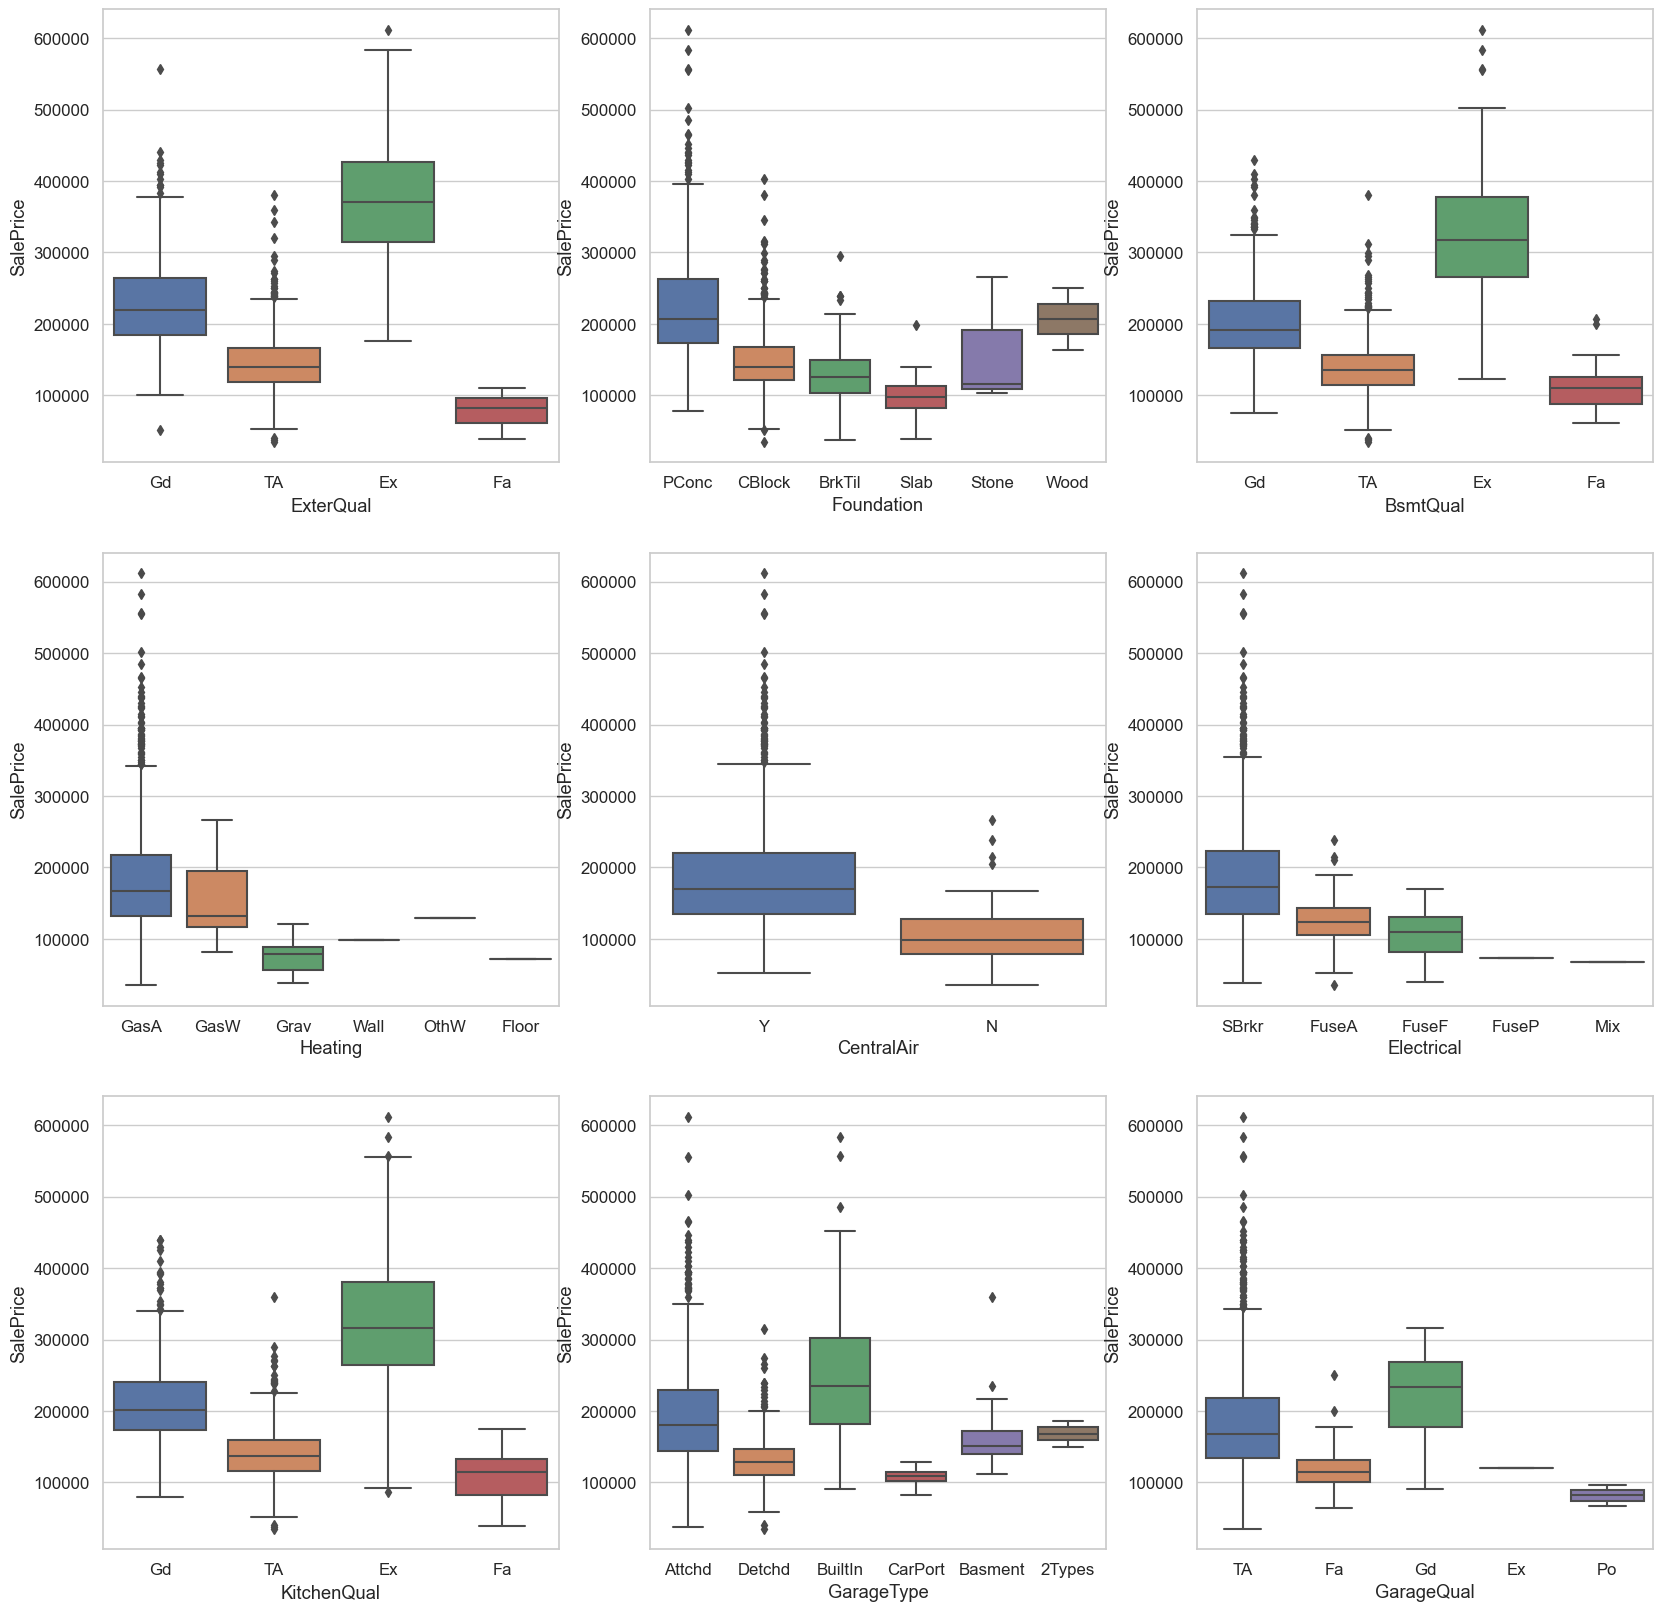

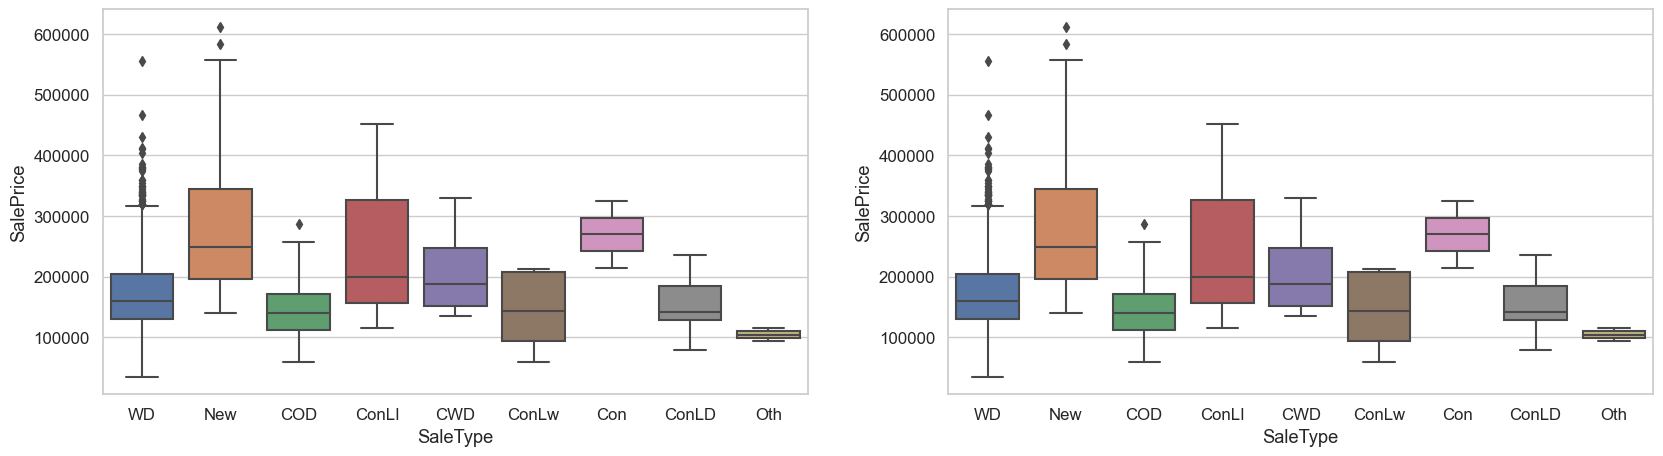

In [543]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=df)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=df)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=df)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=df)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=df)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=df)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=df)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=df)
plt.show()

### Inferences -

- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'

## Data Preprocessing - Tranforming the Target variable(SalePrice)

#### Running a few analysis on the SalePrice variable as it is the target variable

In [544]:
df['SalePrice'].describe()

count      1291.000000
mean     182252.963594
std       75819.673800
min       35311.000000
25%      132000.000000
50%      166000.000000
75%      215600.000000
max      611657.000000
Name: SalePrice, dtype: float64

##### check the distribution of salePrice

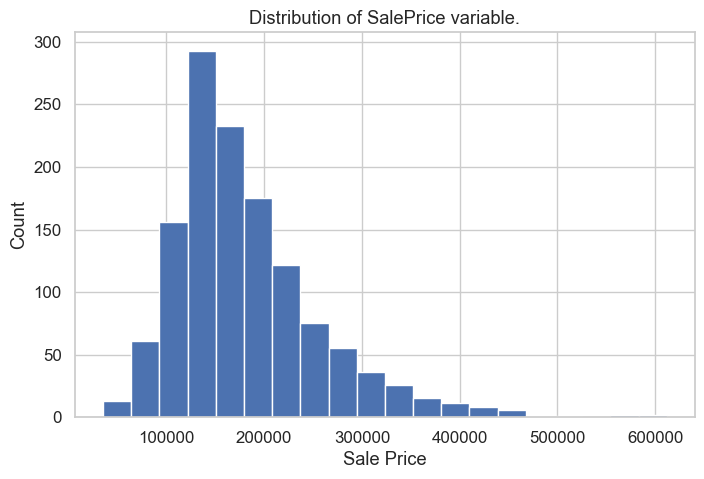

In [545]:
sns.set(style = 'whitegrid', palette = 'deep', font_scale = 1.1, rc = {'figure.figsize':[8,5]})
sns.distplot(df['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws = {'alpha':1}).set(xlabel='Sale Price', ylabel='Count')
plt.title('Distribution of SalePrice variable.')
plt.show()


 mu = 182252.96 and sigma = 75790.30



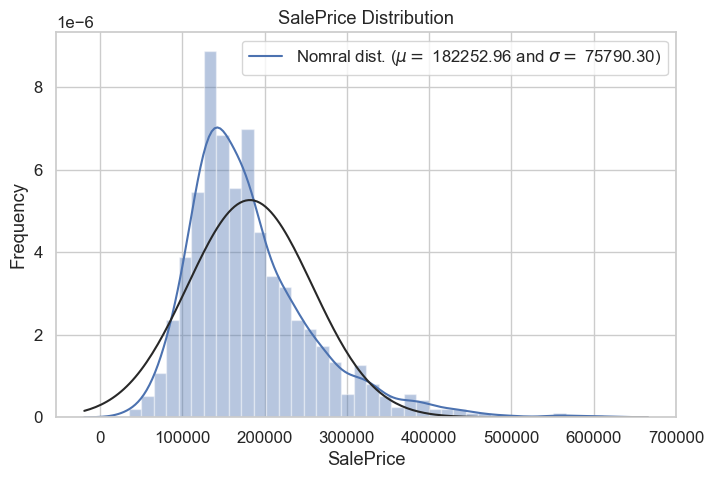

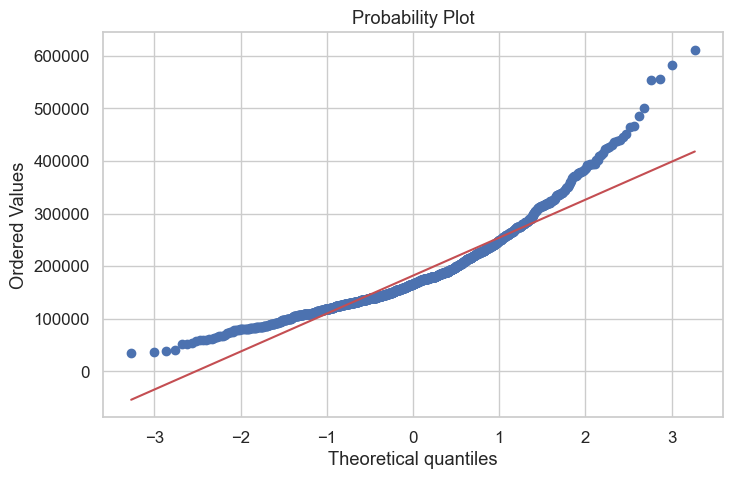

In [546]:
sns.distplot(df['SalePrice'], fit = norm)

#estimating the mu & sigma using the fit function
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

#plotting the distribution
plt.legend(['Nomral dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
          loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

#plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)
plt.show()

 - The target variable is right skewed.We need to transform this variable and make it normally distributed so using log tranformation method

### Log-transformation of the target variable


 mu = 12.04 and sigma = 0.39



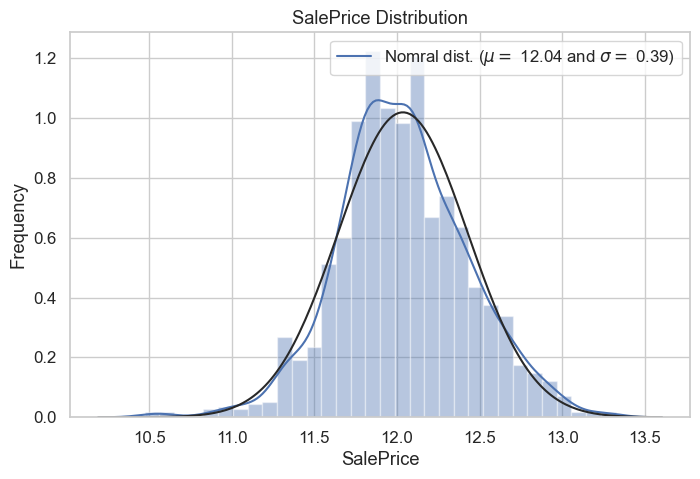

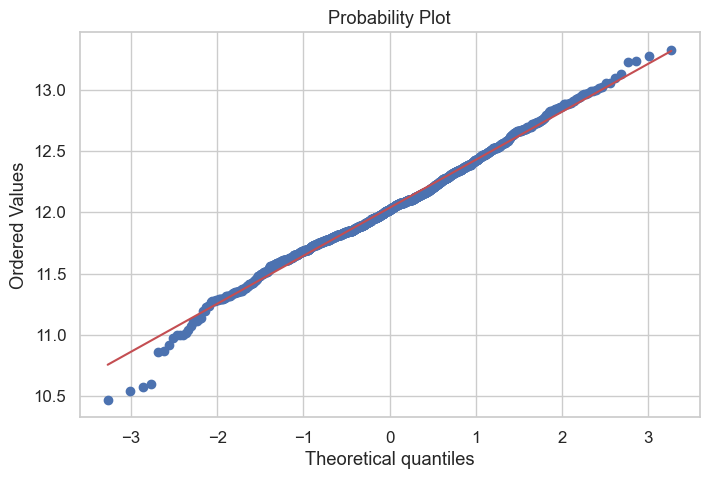

In [547]:
#We use the numpy function log to all elements of the column
df["SalePrice"] = np.log(df["SalePrice"])

#checking the new distribution
sns.distplot(df['SalePrice'], fit = norm)

#estimating the mu & sigma using the fit function
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

#plotting the distribution
plt.legend(['Nomral dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
          loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

#plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)
plt.show()

## Data Preprocessing - Manual Encoding few categorical variables

In [548]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

df['ExterQual'] = df[['ExterQual']].apply(map_function)
df['ExterCond'] = df[['ExterCond']].apply(map_function)
df['BsmtQual'] = df[['BsmtQual']].apply(map_function)
df['BsmtCond'] = df[['BsmtCond']].apply(map_function)
df['BsmtExposure'] = df[['BsmtExposure']].apply(map_function1)
df['BsmtFinType1'] = df[['BsmtFinType1']].apply(map_function2)
df['BsmtFinType2'] = df[['BsmtFinType2']].apply(map_function2)
df['HeatingQC'] = df[['HeatingQC']].apply(map_function)
df['CentralAir'] = df[['CentralAir']].apply(map_function3)
df['KitchenQual'] = df[['KitchenQual']].apply(map_function)
df['Functional'] = df[['Functional']].apply(map_function4)
df['GarageFinish'] = df[['GarageFinish']].apply(map_function5)
df['GarageQual'] = df[['GarageQual']].apply(map_function)
df['GarageCond'] = df[['GarageCond']].apply(map_function)
df['PavedDrive'] = df[['PavedDrive']].apply(map_function6)

##### converting the columns MSSubClass as categorical as it is a categorical col and not numerical

In [549]:
df['MSSubClass']=df['MSSubClass'].astype('object')

In [550]:
cat_feats  = df.dtypes[df.dtypes == "object"].index
cat_feats  

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'], dtype='object')

## Data Preprocessing - Dummy creation for remaining categorical variables

In [551]:
# Creating dummies
dummy = pd.get_dummies(df[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True, dtype = int)
dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
1              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
2              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
3              0              0              0 

In [552]:
# Adding the results back to the cleaned dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  YrSold SaleType SaleCondition  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0          4          3      PConc         4         3             1             6         706             1           0        150          856    GasA          5           1      SBrkr       856       854             0       1710             1             0         2         1             3             1            4             8           8           0     Attchd       2003.0             2           2         548           3           3           2           0           61              0            0        0    2008       WD        Normal  12.247694              0              0              0              0              1              0              0              0              0              0               0   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0          3          3     CBlock         4         3             4             5         978             1           0        284         1262    GasA          5           1      SBrkr      1262         0             0       1262             0             1         2         0             3             1            3             6           8           1     Attchd       1976.0             2           2         460           3           3           2         298            0              0            0        0    2007       WD        Normal  12.109011              0              0              0              0              0              0              0              0              0              0               0   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0          4          3      PConc         4         3             2             6         486             1           0        434          920    GasA          5           1      SBrkr       920       866             0       1786             1             0         2         1             3             1            4             6           8           1     Attchd       2001.0             2           2         608           3           3           2           0           42              0            0        0    2008       WD        Normal  12.317167              0              0              0              0              1              0              0              0              0              0               0   
3   4         70       

In [553]:
# Dropping the columns whose dummies have been created
df.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1, inplace = True)

In [554]:
df.shape

(1291, 196)

## Data Modeling -Test Train spliting

In [555]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(df, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(903, 196)
(388, 196)


In [556]:
house_test.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
962    963         24.0     2308            6            6       1976          1976         0.0          3          3         4         3             1             5         556             1           0        248          804          3           1       804       744             0       1548             1             0         2         1             3             1            4             7           8           1       1976.0             1           2         440           3           3           2          48            0              0            0        0    2007  11.951180              0              0              0              0              0              0              0              0              0              0               0               1               0               0            0            0            1            0            1             0             0             1                0                0                1                 0   
354    355         60.0     8400            6            5       1940          2000         0.0          3          3         3         3             1             2         388             1           0        552          940          5           1      1192       403             0       1595             0             0         1         0             2             1            3             6           8           2       1940.0             1           1         240           3           3           2           0            0            108            0        0    2006  11.849398              0              0              0              1              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                0                 0   
35      36        108.0    13418            8            5       2004          2005       132.0          4          3         5         3             3             1           0             1           0       1117         1117          5           1      1132      1320             0       2452             0             0         3         1             4             1            4             9           8           1       2004.0             3           3         691           3           3           2         113           32              0            0        0    2006  12.641097              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0   
1313  1314        108.0    14774            9            5       1999   

In [557]:
house_train.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
713    714         60.0     9873            4            5       1970          1970       160.0          3          3         3         3             3             5         789             1           0        171          960          3           0       960         0             0        960             1             0         1         0             3             1            3             6           8           0       1970.0             1           2         576           3           3           2           0          288              0            0        0    2006  11.767568              0              0              0              0              0              0              0              0              0              0               0               0               0               1            0            0            1            0            1             0             0             1                0                0                1                 0   
196    197         79.0     9416            7            5       2007          2007       205.0          5          3         5         3             1             6        1126             1           0        600         1726          5           1      1726         0             0       1726             1             0         2         0             3             1            5             8           8           1       2007.0             3           3         786           3           3           2         171          138              0          266        0    2007  12.650348              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0   
1096  1097         60.0     6882            6            7       1914          2006         0.0          3          3         3         3             1             1           0             1           0        684          684          3           1       773       582             0       1355             0             0         1         1             3             1            4             7           8           0       1980.0             1           0           0           3           3           2         136            0            115            0        0    2007  11.751942              0              0              0              0              0              1              0              0              0              0               0               0               0               0            0            0            0            1            1             0             0             1                0                0                1                 0   
419    420         65.0     8450            5            6       1968   

In [558]:
y_train = house_train.pop('SalePrice')
X_train = house_train

In [559]:
y_test = house_test.pop('SalePrice')
X_test = house_test

## Data Modeling - Scaling

#### Scaling the numerical variables

In [560]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [561]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [562]:
X_train.head()

Id  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  YrSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
713   0.489698     0.242236  0.243551     0.333333        0.500   0.703704      0.333333    0.141718   0.333333   0.333333  0.333333  0.666667      0.666667           0.8    0.419681           0.0         0.0   0.073202     0.299439        0.5         0.0  0.244150  0.000000           0.0   0.198164           0.5           0.0  0.333333       0.0      0.500000           0.0     0.333333           0.4         1.0    0.000000     0.615385           0.0        0.50    0.414388         0.5         0.5         1.0    0.000000     0.791209       0.000000     0.000000      0.0    0.00            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             1.0          0.0          0.0          1.0          0.0          1.0           0.0           0.0           1.0              0.0              0.0              1.0               0.0                0.0   
196   0.134615     0.360248  0.230568     0.666667        0.500   0.977778      0.950000    0.181577   1.000000   0.333333  1.000000  0.666667      0.000000           1.0    0.598936           0.0         0.0   0.256849     0.538366        1.0         1.0  0.542902  0.000000           0.0   0.440646           0.5           0.0  0.666667       0.0      0.500000           0.0     1.000000           0.6         1.0    0.333333     0.971154           1.0        0.75    0.565468         0.5         0.5         1.0    0.234890     0.379121       0.000000     0.690909      0.0    0.25            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0          0.0          0.0          1.0          0.0          1.0           0.0           0.0           1.0              0.0              0.0              1.0               0.0                0.0   
1096  0.752747     0.242236  0.158580     0.555556        0.750   0.288889      0.933333    0.000000   0.333333   0.333333  0.333333  0.666667      0.000000           0.0    0.000000           0.0         0.0   0.292808     0.213350        0.5         1.0  0.171217  0.320132           0.0   0.323204           0.0           0.0  0.333333       0.5      0.500000           0.0     0.666667           0.5         1.0    0.000000     0.711538           0.0        0.00    0.000000         0.5         0.5         1.0    0.186813     0.000000       0.297927     0.000000      0.0    0.25            0.0            0.0            0.0            0.0            0.0            1.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0          0.0          0.0          0.0          1.0          1.0           0.0           0.0           1.0              0.0              0.0              1.0               0.0                0.0   
419   0.287775     0.273

In [563]:
X_train.describe()

Id  LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  MasVnrArea   ExterQual   ExterCond    BsmtQual    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF   HeatingQC  CentralAir    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal      YrSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
count  903.000000   903.000000  903.000000   903.000000   903.000000  903.000000    903.000000  903.000000  903.000000  903.000000  903.000000  903.000000    903.000000    903.000000  903.000000    903.000000  903.000000  903.000000   903.000000  903.000000  903.000000  903.000000  903.000000         903.0  903.000000    903.000000    903.000000  903.000000  903.000000    903.000000         903.0   903.000000    903.000000  903.000000  903.000000   903.000000    903.000000  903.000000  903.000000  903.000000  903.000000  903.000000  903.000000   903.000000     903.000000   903.000000    903.0  903.000000     903.000000     903.000000     903.000000     903.000000     903.000000     903.000000     903.000000     903.000000     903.000000     903.000000      903.000000      903.000000      903.000000      903.000000   903.000000   903.000000    903.00000   903.000000   903.000000    903.000000    903.000000    903.000000       903.000000       903.000000       903.000000   
mean     0.504897     0.303516    0.237347     0.577089     0.572813    0.730790      0.602233    0.094264    0.476560    0.363234    0.535991    0.671096      0.231820      0.534219    0.235145      0.050055    0.045209    0.249052     0.332133    0.797619    0.955703    0.318643    0.184109           0.0    0.364581      0.210963      0.056478    0.518272    0.192691      0.469177           0.0     0.516058      0.439978    0.974529    0.206718     0.706566      0.405869    0.443245    0.341448    0.494463    0.494740    0.950166    0.125322     0.128546       0.054611     0.039999      0.0    0.445183       0.047619       0.002215       0.008859       0.093023       0.214839       0.044297       0.007752       0.046512       0.018826       0.005537        0.064230        0.044297        0.008859        0.009967     0.048726     0.008859      0.79845     0.140642     0.998893      0.019934      0.006645      0.631229         0.036545         0.023256         0.902547   
std      0.286529     0.125100    0.115365     0.148219     0.137763    0.217801      0.341804    0.154266    0.192007    0.110840    0.226704    0.096655      0.348377      0.413697    0.222871      0.161950    0.154064    0.191922     0.121329    0.237964    0.205868    0.140944    0.234251           0.0    0.152122      0.250413      0.230971    0.178631    0.244613      0.123854           0.0     0.220767      0.150854    0.119191    0.207851     0.234070      0.405066    0.182079    0.149122    0.056184    0.056824    0.217722    0.161421     0.169851       0.151478     0.141379      0.0    0.329047       0.213077       0.047036       0.093758       0.290626       0.410939       0.205868       0.087752       0.210707       0.135986       0.074247        0.245299        0.205868        0.093758        0.099390     0.215415     0.093758      0.40138     0.347845     0.033278      0.139849      0.081288      0.482739         0.187745         0.150798         0.296738   
min      0.000000     0.000000    0.000000     0.000000     0.00000

In [564]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

713     11.767568
196     12.650348
1096    11.751942
419     11.863582
1449    11.429544
Name: SalePrice, dtype: float64

## Data Modeling - RFE Technique

In [565]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [566]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[-1.26783806e-02  2.65193698e-02  2.24908006e-01  3.80124762e-01
  2.59827579e-01  2.08210075e-01  1.95365489e-02  6.18758611e-02
  5.01707705e-02 -8.50147053e-02  3.65749048e-02 -8.25966614e-03
  3.55024878e-02  2.00518465e-02  9.93936668e+09  9.42485206e-04
  4.78992883e+09  1.23501918e+10 -1.69497923e+10  5.05518626e-02
  3.53531780e-02 -7.57712757e+08 -5.37254989e+08  2.53418259e+10
  9.33547036e+08  4.84718859e-02  2.15438634e-02  8.43011992e-02
  4.68978504e-02 -1.56976232e-02  3.46646836e+09  7.41142599e-02
  5.10766069e-02  1.55601501e-01  1.64194107e-02 -3.47194672e-02
  1.34191513e-02  1.56231642e-01  1.39618158e-01  1.68061465e-01
 -1.24967098e-02  7.32338428e-02  5.41599989e-02  7.85772800e-02
  2.12084055e-02  1.27688408e-01 -7.75398720e+09  6.35147095e-04
 -4.70848083e-02 -1.30987167e-02 -2.80907719e+09  5.89704514e-02
 -3.86357307e-02  3.69482040e-02  5.25420617e+09 -9.97080803e-02
 -5.81128597e-02 -1.94993899e+10 -7.08556175e-03 -1.01193726e-01
 -1.61939621e-01 -1.82493

In [567]:
# Assuming you have X_train and y_train defined

# Initialize Linear Regression model
lm = LinearRegression()

# Initialize RFE with Linear Regression model
rfe = RFE(estimator=lm, n_features_to_select=90)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Print the selected features (True or False)
print(rfe.support_)

# Print the ranking of features
print(rfe.ranking_)

[False False  True  True  True  True False  True  True  True  True False
 False False  True False  True  True  True  True False  True  True  True
  True False False False False False  True  True False  True False False
 False  True  True  True False  True  True  True False  True  True False
 False False  True False False False  True False False  True False  True
  True False  True  True  True  True False False False False False False
 False  True False False False False False  True False False False False
 False  True False False False  True False False False False False False
 False False False False False  True False False  True  True  True  True
 False  True  True  True  True  True  True False  True False False  True
 False  True  True False False False  True  True  True  True  True  True
  True False False  True False  True  True False  True False False  True
 False False  True False False  True False  True  True False False False
 False False False False False  True False False Fa

In [568]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MiscVal', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
  

In [569]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['Id', 'LotFrontage', 'YearRemodAdd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=105)

In [570]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [571]:
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

const   LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  KitchenAbvGr  KitchenQual  Functional  GarageCars  GarageArea  GarageQual  PavedDrive  WoodDeckSF  OpenPorchSF  ScreenPorch  MiscVal  MSSubClass_45  MSSubClass_75  MSSubClass_90  MSSubClass_160  MSSubClass_180  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Utilities_NoSeWa  LandSlope_Sev  Neighborhood_Crawfor  Neighborhood_MeadowV  Neighborhood_StoneBr  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Norm  Condition2_PosN  Condition2_RRNn  BldgType_Duplex  HouseStyle_1.5Unf  HouseStyle_2.5Fin  HouseStyle_2.5Unf  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_Tar&Grv  Exterior1st_BrkComm  Exterior1st_CBlock  Exterior1st_CemntBd  \
713     1.0  0.243551     0.333333        0.500   0.703704    0.141718   0.333333   0.333333  0.333333    0.419681         0.0   0.073202     0.299439        0.5  0.244150  0.000000           0.0   0.198164           0.0     0.333333         1.0        0.50    0.414388         0.5         1.0    0.000000     0.791209     0.000000      0.0            0.0            0.0            0.0             0.0             0.0          0.0          0.0          1.0          0.0               0.0            0.0                   0.0                   0.0                   0.0               0.0              0.0              0.0              0.0              1.0              0.0              0.0              1.0              0.0              0.0              0.0                0.0                0.0                0.0              1.0                0.0            0.0                0.0             0.0             0.0               0.0                  0.0                 0.0                  0.0   
196     1.0  0.230568     0.666667        0.500   0.977778    0.181577   1.000000   0.333333  1.000000    0.598936         0.0   0.256849     0.538366        1.0  0.542902  0.000000           0.0   0.440646           0.0     1.000000         1.0        0.75    0.565468         0.5         1.0    0.234890     0.379121     0.690909      0.0            0.0            0.0            0.0             0.0             0.0          0.0          0.0          1.0          0.0               0.0            0.0                   0.0                   0.0                   0.0               0.0              1.0              0.0              0.0              0.0              0.0              0.0              1.0              0.0              0.0              0.0                0.0                0.0                0.0              0.0                0.0            1.0                0.0             0.0             0.0               0.0                  0.0                 0.0                  1.0   
1096    1.0  0.158580     0.555556        0.750   0.288889    0.000000   0.333333   0.333333  0.333333    0.000000         0.0   0.292808     0.213350        0.5  0.171217  0.320132           0.0   0.323204           0.0     0.666667         1.0        0.00    0.000000         0.5         1.0    0.186813     0.000000     0.000000      0.0            0.0            0.0            0.0             0.0             0.0          0.0          0.0          0.0          1.0               0.0            0.0                   0.0                   0.0                   0.0               0.0              1.0              0.0              0.0              0.0              0.0              0.0              1.0              0.0              0.0              0.0                0.0                0.0                0.0              1.0                0.0            0.0                0.0             0.0             0.0               0.0                  0.0                 0.0                  0.0   
419     1.

In [572]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:08:57   Log-Likelihood:                 832.07
No. Observations:                 903   AIC:                            -1512.
Df Residuals:                     827   BIC:                            -1147.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.35

In [573]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features    VIF
0                   const   0.00
1                 LotArea   1.86
2             OverallQual   4.37
3             OverallCond   1.79
4               YearBuilt   6.97
5              MasVnrArea   1.54
6               ExterQual   3.46
7               ExterCond   1.32
8                BsmtQual   3.43
9              BsmtFinSF1    inf
10             BsmtFinSF2    inf
11              BsmtUnfSF    inf
12            TotalBsmtSF    inf
13              HeatingQC   1.83
14               1stFlrSF    inf
15               2ndFlrSF    inf
16           LowQualFinSF    NaN
17              GrLivArea    inf
18           KitchenAbvGr    NaN
19            KitchenQual   2.77
20             Functional   1.30
21             GarageCars   6.36
22             GarageArea   5.68
23             GarageQual   1.28
24             PavedDrive   1.50
25             WoodDeckSF   1.35
26            OpenPorchSF   1.44
27            ScreenPorch   1.14
28                MiscVal    NaN
29          MSSubClass_45    inf
30          MSSubClass_75    inf
31          MSSubClass_90    inf
32         MSSubClass_160   1.89
33         MSSubClass_180   1.87
34            MSZoning_FV  20.02
35            MSZoning_RH   4.22
36            MSZoning_RL  65.30
37            MSZoning_RM  49.53
38       Utilities_NoSeWa    NaN
39          LandSlope_Sev   1.84
40   Neighborhood_Crawfor   1.38
41   Neighborhood_MeadowV   2.47
42   Neighborhood_StoneBr   1.13
43       Condition1_Feedr   2.51
44        Condition1_Norm   4.10
45        Condition1_PosA   1.34
46        Condition1_PosN   1.64
47        Condition1_RRAn   2.01
48        Condition1_RRNe   1.05
49        Condition1_RRNn   1.28
50        Condition2_Norm   1.66
51        Condition2_PosN    NaN
52        Condition2_RRNn   1.41
53        BldgType_Duplex    inf
54      HouseStyle_1.5Unf    inf
55      HouseStyle_2.5Fin    inf
56      HouseStyle_2.5Unf    inf
57        RoofStyle_Gable    inf
58      RoofStyle_Gambrel    inf
59          RoofStyle_Hip    inf
60      RoofStyle_Mansard    inf
61         RoofStyle_Shed    inf
62         RoofMatl_Metal    inf
63       RoofMatl_Tar&Grv    inf
64    Exterior1st_BrkComm   1.91
65     Exterior1st_CBlock    inf
66    Exterior1st_CemntBd  44.71
67    Exterior1st_ImStucc    NaN
68      Exterior1st_Stone   1.14
69    Exterior1st_Wd Sdng   4.66
70    Exterior2nd_Brk Cmn   1.56
71     Exterior2nd_CBlock    inf
72    Exterior2nd_CmentBd  44.34
73    Exterior2nd_Wd Sdng   4.48
74       Foundation_Stone   1.63
75           Heating_GasA    inf
76           Heating_GasW    inf
77           Heating_Grav    inf
78           Heating_OthW    inf
79           Heating_Wall    inf
80      GarageType_Attchd    inf
81     GarageType_Basment    inf
82     GarageType_BuiltIn    inf
83     GarageType_CarPort    inf
84      GarageType_Detchd    inf
85           SaleType_CWD   1.11
86           SaleType_Con   1.05
87           SaleType_New   1.40
88           SaleType_Oth   1.03
89  SaleCondition_AdjLand   1.02
90   SaleCondition_Alloca   1.38

- The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.
- Though the accuracy the good it has many features and highly collinear.

In [574]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [575]:
X_train

LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  KitchenAbvGr  KitchenQual  Functional  GarageCars  GarageArea  GarageQual  PavedDrive  WoodDeckSF  OpenPorchSF  ScreenPorch  MiscVal  MSSubClass_45  MSSubClass_75  MSSubClass_90  MSSubClass_160  MSSubClass_180  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Utilities_NoSeWa  LandSlope_Sev  Neighborhood_Crawfor  Neighborhood_MeadowV  Neighborhood_StoneBr  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Norm  Condition2_PosN  Condition2_RRNn  BldgType_Duplex  HouseStyle_1.5Unf  HouseStyle_2.5Fin  HouseStyle_2.5Unf  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_Tar&Grv  Exterior1st_BrkComm  Exterior1st_CBlock  Exterior1st_CemntBd  \
713   0.243551     0.333333        0.500   0.703704    0.141718   0.333333   0.333333  0.333333    0.419681    0.000000   0.073202     0.299439       0.50  0.244150  0.000000           0.0   0.198164           0.0     0.333333         1.0        0.50    0.414388         0.5         1.0    0.000000     0.791209     0.000000      0.0            0.0            0.0            0.0             0.0             0.0          0.0          0.0          1.0          0.0               0.0            0.0                   0.0                   0.0                   0.0               0.0              0.0              0.0              0.0              1.0              0.0              0.0              1.0              0.0              0.0              0.0                0.0                0.0                0.0              1.0                0.0            0.0                0.0             0.0             0.0               0.0                  0.0                 0.0                  0.0   
196   0.230568     0.666667        0.500   0.977778    0.181577   1.000000   0.333333  1.000000    0.598936    0.000000   0.256849     0.538366       1.00  0.542902  0.000000           0.0   0.440646           0.0     1.000000         1.0        0.75    0.565468         0.5         1.0    0.234890     0.379121     0.690909      0.0            0.0            0.0            0.0             0.0             0.0          0.0          0.0          1.0          0.0               0.0            0.0                   0.0                   0.0                   0.0               0.0              1.0              0.0              0.0              0.0              0.0              0.0              1.0              0.0              0.0              0.0                0.0                0.0                0.0              0.0                0.0            1.0                0.0             0.0             0.0               0.0                  0.0                 0.0                  1.0   
1096  0.158580     0.555556        0.750   0.288889    0.000000   0.333333   0.333333  0.333333    0.000000    0.000000   0.292808     0.213350       0.50  0.171217  0.320132           0.0   0.323204           0.0     0.666667         1.0        0.00    0.000000         0.5         1.0    0.186813     0.000000     0.000000      0.0            0.0            0.0            0.0             0.0             0.0          0.0          0.0          0.0          1.0               0.0            0.0                   0.0                   0.0                   0.0               0.0              1.0              0.0              0.0              0.0              0.0              0.0              1.0              0.0              0.0              0.0                0.0                0.0                0.0              1.0                0.0            0.0                0.0             0.0             0.0               0.0                  0.0                 0.0                  0.0   
419   0.203125     0.444444        0.62

## Data Modeling - Advanced Regression

Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

### Ridge Regression model

In [576]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9369041779996194


##### Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [577]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [578]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha            params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.011091      0.010585         0.001230        0.000273       0.001  {'alpha': 0.001}          -0.082196          -0.072419          -0.080272          -0.074391          -0.077480        -0.077351        0.003609                4           -0.065837           -0.066292           -0.065899           -0.066394           -0.066903         -0.066265         0.000385
1       0.008539      0.008817         0.001876        0.001482        0.01   {'alpha': 0.01}          -0.082141          -0.072391          -0.080197          -0.074342          -0.077474        -0.077309        0.003597                3           -0.065862           -0.066312           -0.065925           -0.066407           -0.066905         -0.066282         0.000376
2       0.004736      0.002006         0.001852        0.000785         0.5    {'alpha': 0.5}          -0.080449          -0.071949          -0.078517          -0.072996          -0.076449        -0.076072        0.003217                2           -0.066976           -0.067462           -0.067010           -0.067275           -0.067412         -0.067227         0.000201
3       0.005084      0.002958         0.002274        0.001022         1.0    {'alpha': 1.0}          -0.079675          -0.072048          -0.078126          -0.072670          -0.075521        -0.075608        0.002973                1           -0.067759           -0.068277           -0.067654           -0.067934           -0.067924         -0.067910         0.000212
4       0.006256      0.003823         0.001961        0.001409        10.0   {'alpha': 10.0}          -0.085810          -0.082958          -0.083592          -0.079048          -0.075727        -0.081427        0.003589                5           -0.078022           -0.078287           -0.077018           -0.077831           -0.077917         -0.077815         0.000427
5       0.004435      0.002668         0.002651        0.002519          50     {'alpha': 50}          -0.124721          -0.116579          -0.107135          -0.108655          -0.100198        -0.111458        0.008432                6           -0.108673           -0.108838           -0.108674           -0.109267           -0.110208         -0.109132         0.000580
6       0.004092      0.002466         0.001643        0.000811         100    {'alpha': 100}          -0.154841          -0.142847          -0.127562          -0.134251          -0.125071        -0.136914        0.010875                7           -0.134301           -0.134201           -0.135770           -0.134975           -0.136408         -0.135131         0.000850
7       0.002783      0.000731         0.001623        0.000746         500    {'alpha': 500}          -0.241226          -0.223591          -0.197888          -0.209774          -0.203979        -0.215292        0.015510                8           -0.211535           -0.212560           -0.217380           -0.214421           -0.216282         -0.214436         0.002191
8       0.003630      0.001759         0.001182        0.000377        1000   {'alpha': 1000}          -0.273203          -0.255575          -0.227343          -0.238711          -0.236936        -0.246354        0.016214                9           -0.241431           -0.243578           -0.249536           -0.246406           -0.247400         -0.245670         0.002857

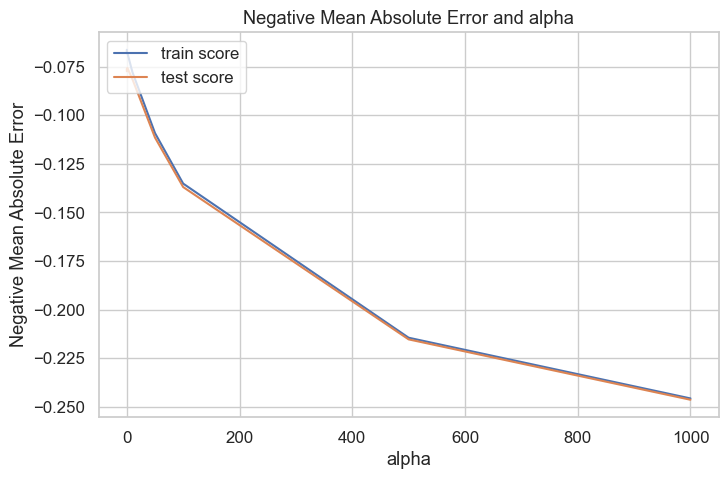

In [579]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [580]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [581]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha            params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.007129      0.005905         0.002103        0.001228       0.001  {'alpha': 0.001}          -0.082196          -0.072419          -0.080272          -0.074391          -0.077480        -0.077351        0.003609                7           -0.065837           -0.066292           -0.065899           -0.066394           -0.066903         -0.066265         0.000385
1       0.003254      0.001264         0.001368        0.000401        0.01   {'alpha': 0.01}          -0.082141          -0.072391          -0.080197          -0.074342          -0.077474        -0.077309        0.003597                6           -0.065862           -0.066312           -0.065925           -0.066407           -0.066905         -0.066282         0.000376
2       0.002928      0.001096         0.001336        0.000682         1.0    {'alpha': 1.0}          -0.079675          -0.072048          -0.078126          -0.072670          -0.075521        -0.075608        0.002973                2           -0.067759           -0.068277           -0.067654           -0.067934           -0.067924         -0.067910         0.000212
3       0.003764      0.001439         0.002023        0.000860         2.0    {'alpha': 2.0}          -0.079138          -0.072864          -0.078486          -0.072954          -0.074468        -0.075582        0.002706                1           -0.069221           -0.069578           -0.068871           -0.069245           -0.069121         -0.069207         0.000228
4       0.003470      0.001774         0.001169        0.000336         3.0    {'alpha': 3.0}          -0.079241          -0.074197          -0.079030          -0.073441          -0.074043        -0.075990        0.002581                3           -0.070453           -0.070821           -0.069983           -0.070441           -0.070395         -0.070419         0.000266
5       0.007376      0.004280         0.003224        0.002284         4.0    {'alpha': 4.0}          -0.079626          -0.075645          -0.079633          -0.074145          -0.073746        -0.076559        0.002586                4           -0.071626           -0.071984           -0.071046           -0.071557           -0.071587         -0.071560         0.000300
6       0.003299      0.001256         0.001060        0.000115         5.0    {'alpha': 5.0}          -0.080383          -0.076981          -0.080229          -0.074902          -0.073926        -0.077284        0.002658                5           -0.072782           -0.073075           -0.072128           -0.072637           -0.072729         -0.072670         0.000308
7       0.004669      0.003391         0.001272        0.000492         6.0    {'alpha': 6.0}          -0.081270          -0.078200          -0.080782          -0.075691          -0.074152        -0.078019        0.002779                8           -0.073968           -0.074153           -0.073158           -0.073695           -0.073803         -0.073755         0.000337
8       0.002882      0.001309         0.001244        0.000507         7.0    {'alpha': 7.0}          -0.082340          -0.079471          -0.081401          -0.076599          -0.074377        -0.078838        0.002971                9           -0.075072           -0.075197           -0.074199           -0.074725           -0.074853         -0.074809         0.000347
9       0.004016      0.002136         0.001724        0.001089         8.0    {'alpha': 8.0}          -0.083411          -0.080705          -0.082052          -0.077452          -0.074726        -0.079669        0.003165               10           -0.076103     

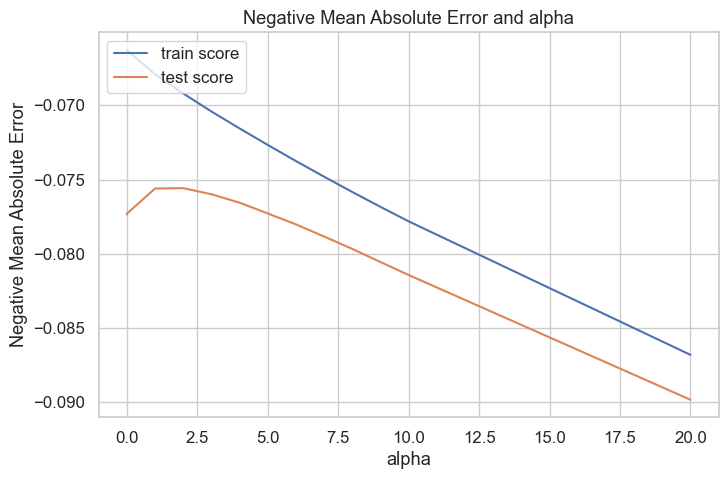

In [582]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- We see that the optimal alpha value is between 0-2

In [583]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=2.0)
 The best r2 score is obtained at alpha 2.0


### Building ridge regression model with optimal alpha value

In [584]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [585]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

- We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [586]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features  Coefficient        Mod
0             Id    10.166797  10.166797
2        LotArea     0.445656   0.445656
17     BsmtUnfSF     0.387580   0.387580
14    BsmtFinSF1     0.302221   0.302221
3    OverallQual     0.268587   0.268587
15  BsmtFinType2     0.247234   0.247234
1    LotFrontage     0.228566   0.228566
34    Fireplaces     0.226903   0.226903
9      ExterCond     0.223499   0.223499
12  BsmtExposure     0.192634   0.192634

In [587]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9339
Ridge regression test r2:  0.9096


## Analysis for subjective questions: Doubling alpha for Ridge for Question 1

In [588]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=2.0)
ridge.fit(X_train, y_train)

#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features  Coefficient        Mod
0             Id    10.291381  10.291381
2        LotArea     0.419276   0.419276
17     BsmtUnfSF     0.372885   0.372885
14    BsmtFinSF1     0.285642   0.285642
3    OverallQual     0.248310   0.248310
15  BsmtFinType2     0.245081   0.245081
9      ExterCond     0.220682   0.220682
1    LotFrontage     0.207987   0.207987
21      1stFlrSF     0.191997   0.191997
12  BsmtExposure     0.191044   0.191044

In [589]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9315
Ridge regression test r2:  0.9069


### Lasso Regression model

In [590]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [591]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.040218      0.015142         0.002651        0.000849      0.0001  {'alpha': 0.0001}          -0.079900          -0.072192          -0.079019          -0.072759          -0.076772        -0.076129        0.003157                1           -0.067882           -0.068201           -0.067355           -0.067773           -0.067880         -0.067818         0.000272
1       0.007931      0.003192         0.001324        0.000367       0.001   {'alpha': 0.001}          -0.080117          -0.076795          -0.079349          -0.074071          -0.077619        -0.077590        0.002121                2           -0.073898           -0.075165           -0.073033           -0.074678           -0.074610         -0.074277         0.000742
2       0.008717      0.005761         0.003480        0.002935        0.01    {'alpha': 0.01}          -0.125255          -0.122198          -0.098927          -0.106356          -0.106028        -0.111753        0.010176                3           -0.110434           -0.108460           -0.111595           -0.110111           -0.109184         -0.109957         0.001075
3       0.003468      0.001137         0.001695        0.000840        0.05    {'alpha': 0.05}          -0.305124          -0.282623          -0.249623          -0.260649          -0.259563        -0.271517        0.019966                4           -0.269385           -0.267644           -0.275197           -0.269786           -0.270130         -0.270428         0.002533
4       0.002707      0.001199         0.001251        0.000511         0.1     {'alpha': 0.1}          -0.328806          -0.310367          -0.282684          -0.292937          -0.293900        -0.301739        0.016181                5           -0.294813           -0.299395           -0.306259           -0.303704           -0.303707         -0.301576         0.004037

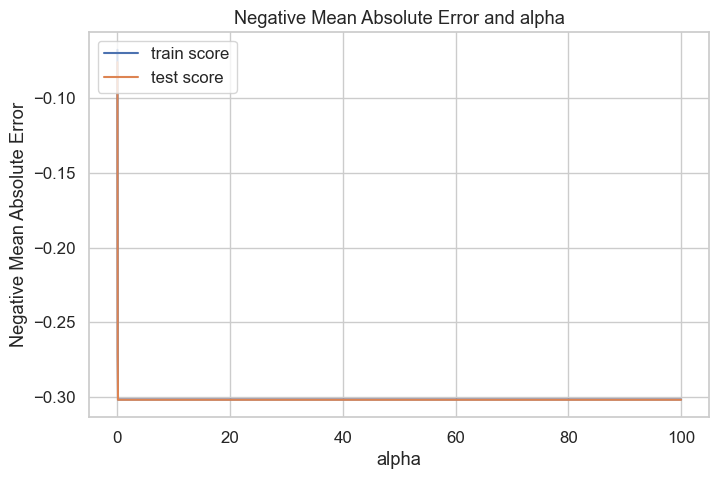

In [592]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- This graphs shows that alpha value might be ver less than 1

In [593]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [594]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha            params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.009586      0.002500         0.001994        0.001164       0.001  {'alpha': 0.001}          -0.080117          -0.076795          -0.079349          -0.074071          -0.077619        -0.077590        0.002121                1           -0.073898           -0.075165           -0.073033           -0.074678           -0.074610         -0.074277         0.000742
1       0.003936      0.000914         0.001355        0.000658        0.01   {'alpha': 0.01}          -0.125255          -0.122198          -0.098927          -0.106356          -0.106028        -0.111753        0.010176                2           -0.110434           -0.108460           -0.111595           -0.110111           -0.109184         -0.109957         0.001075
2       0.003731      0.002022         0.001018        0.000033        0.05   {'alpha': 0.05}          -0.305124          -0.282623          -0.249623          -0.260649          -0.259563        -0.271517        0.019966                3           -0.269385           -0.267644           -0.275197           -0.269786           -0.270130         -0.270428         0.002533
3       0.002846      0.001558         0.001140        0.000316         0.1    {'alpha': 0.1}          -0.328806          -0.310367          -0.282684          -0.292937          -0.293900        -0.301739        0.016181                4           -0.294813           -0.299395           -0.306259           -0.303704           -0.303707         -0.301576         0.004037
4       0.003326      0.001236         0.001596        0.000752         0.2    {'alpha': 0.2}          -0.328806          -0.310367          -0.282684          -0.292937          -0.293900        -0.301739        0.016181                4           -0.294813           -0.299395           -0.306259           -0.303704           -0.303707         -0.301576         0.004037

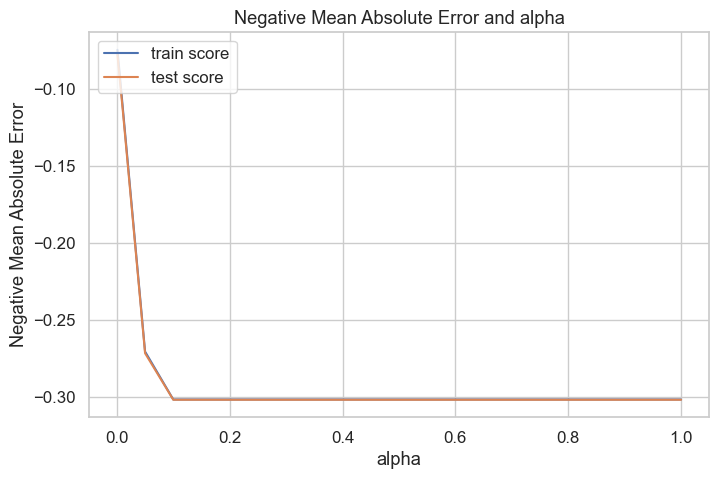

In [595]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [596]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

#### Tuning it further

In [597]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [598]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.034456      0.006365         0.001808        0.001238      0.0001  {'alpha': 0.0001}          -0.079900          -0.072192          -0.079019          -0.072759          -0.076772        -0.076129        0.003157                1           -0.067882           -0.068201           -0.067355           -0.067773           -0.067880         -0.067818         0.000272
1       0.006232      0.001189         0.003478        0.003360       0.001   {'alpha': 0.001}          -0.080117          -0.076795          -0.079349          -0.074071          -0.077619        -0.077590        0.002121                2           -0.073898           -0.075165           -0.073033           -0.074678           -0.074610         -0.074277         0.000742
2       0.005066      0.002307         0.002055        0.000961        0.01    {'alpha': 0.01}          -0.125255          -0.122198          -0.098927          -0.106356          -0.106028        -0.111753        0.010176                3           -0.110434           -0.108460           -0.111595           -0.110111           -0.109184         -0.109957         0.001075
3       0.003362      0.001412         0.001343        0.000676        0.05    {'alpha': 0.05}          -0.305124          -0.282623          -0.249623          -0.260649          -0.259563        -0.271517        0.019966                4           -0.269385           -0.267644           -0.275197           -0.269786           -0.270130         -0.270428         0.002533
4       0.002693      0.001187         0.001220        0.000427         0.1     {'alpha': 0.1}          -0.328806          -0.310367          -0.282684          -0.292937          -0.293900        -0.301739        0.016181                5           -0.294813           -0.299395           -0.306259           -0.303704           -0.303707         -0.301576         0.004037

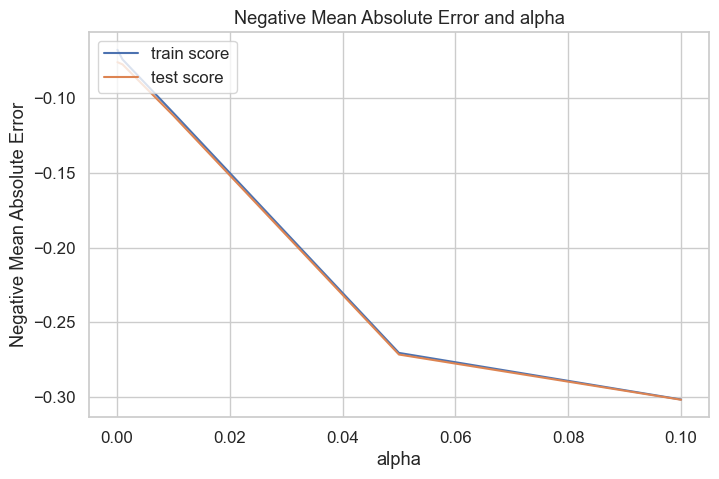

In [599]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [600]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [601]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.062558      0.003640         0.002911        0.001374     0.00001   {'alpha': 1e-05}          -0.081971          -0.072140          -0.080294          -0.074176          -0.077535        -0.077223        0.003666                2           -0.065986           -0.066453           -0.066028           -0.066478           -0.066976         -0.066384         0.000361
1       0.031796      0.003263         0.001798        0.000955      0.0001  {'alpha': 0.0001}          -0.079900          -0.072192          -0.079019          -0.072759          -0.076772        -0.076129        0.003157                1           -0.067882           -0.068201           -0.067355           -0.067773           -0.067880         -0.067818         0.000272
2       0.006776      0.002150         0.001961        0.000808       0.001   {'alpha': 0.001}          -0.080117          -0.076795          -0.079349          -0.074071          -0.077619        -0.077590        0.002121                3           -0.073898           -0.075165           -0.073033           -0.074678           -0.074610         -0.074277         0.000742
3       0.003990      0.001623         0.001460        0.000600        0.01    {'alpha': 0.01}          -0.125255          -0.122198          -0.098927          -0.106356          -0.106028        -0.111753        0.010176                4           -0.110434           -0.108460           -0.111595           -0.110111           -0.109184         -0.109957         0.001075
4       0.003537      0.001532         0.001220        0.000456        0.05    {'alpha': 0.05}          -0.305124          -0.282623          -0.249623          -0.260649          -0.259563        -0.271517        0.019966                5           -0.269385           -0.267644           -0.275197           -0.269786           -0.270130         -0.270428         0.002533

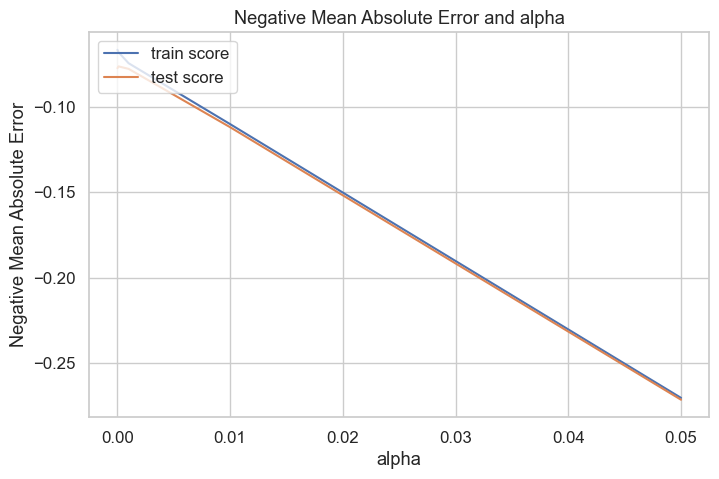

In [602]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [603]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [604]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [605]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.061744      0.001221         0.001161        0.000096     0.00001   {'alpha': 1e-05}          -0.081971          -0.072140          -0.080294          -0.074176          -0.077535        -0.077223        0.003666                2           -0.065986           -0.066453           -0.066028           -0.066478           -0.066976         -0.066384         0.000361
1       0.033035      0.001906         0.001764        0.000606      0.0001  {'alpha': 0.0001}          -0.079900          -0.072192          -0.079019          -0.072759          -0.076772        -0.076129        0.003157                1           -0.067882           -0.068201           -0.067355           -0.067773           -0.067880         -0.067818         0.000272
2       0.006987      0.001953         0.001199        0.000208       0.001   {'alpha': 0.001}          -0.080117          -0.076795          -0.079349          -0.074071          -0.077619        -0.077590        0.002121                3           -0.073898           -0.075165           -0.073033           -0.074678           -0.074610         -0.074277         0.000742

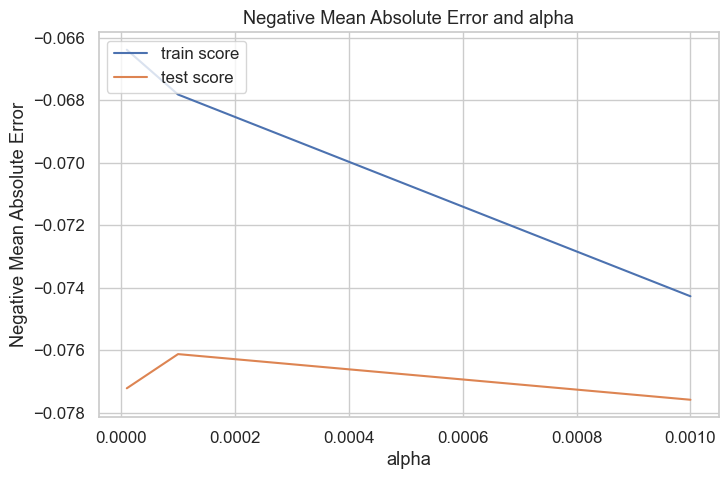

In [606]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [607]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

#### Building Lasso regression model with optimal alpha value

In [608]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9345777236273369
Lasso Regression test r2: 0.9131849188059984


In [609]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

 - We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [610]:
lasso_coef

Feature       Coef        mod
0                 LotArea  10.034896  10.034896
1             OverallQual   0.248875   0.248875
2             OverallCond   0.490506   0.490506
3               YearBuilt   0.279993   0.279993
4              MasVnrArea   0.203310   0.203310
5               ExterQual   0.046924   0.046924
6               ExterCond   0.076732   0.076732
7                BsmtQual  -0.086698   0.086698
8              BsmtFinSF1   0.068785   0.068785
9              BsmtFinSF2   0.173845   0.173845
10              BsmtUnfSF   0.025135   0.025135
11            TotalBsmtSF   0.000000   0.000000
12              HeatingQC   0.257787   0.257787
13               1stFlrSF   0.086027   0.086027
14               2ndFlrSF   0.000000   0.000000
15           LowQualFinSF   0.004950   0.004950
16              GrLivArea   0.000000   0.000000
17           KitchenAbvGr   0.818402   0.818402
18            KitchenQual   0.000000   0.000000
19             Functional   0.083197   0.083197
20             GarageCars   0.135439   0.135439
21             GarageArea   0.179038   0.179038
22             GarageQual   0.131314   0.131314
23             PavedDrive   0.092286   0.092286
24             WoodDeckSF   0.070333   0.070333
25            OpenPorchSF   0.058836   0.058836
26            ScreenPorch   0.097301   0.097301
27                MiscVal   0.110438   0.110438
28          MSSubClass_45   0.000000   0.000000
29          MSSubClass_75   0.000403   0.000403
30          MSSubClass_90   0.000000   0.000000
31         MSSubClass_160  -0.000000   0.000000
32         MSSubClass_180  -0.071763   0.071763
33            MSZoning_FV  -0.047180   0.047180
34            MSZoning_RH   0.352156   0.352156
35            MSZoning_RL   0.290876   0.290876
36            MSZoning_RM   0.306016   0.306016
37       Utilities_NoSeWa   0.280602   0.280602
38          LandSlope_Sev   0.000000   0.000000
39   Neighborhood_Crawfor  -0.075052   0.075052
40   Neighborhood_MeadowV   0.138703   0.138703
41   Neighborhood_StoneBr  -0.057316   0.057316
42       Condition1_Feedr   0.108349   0.108349
43        Condition1_Norm   0.043661   0.043661
44        Condition1_PosA   0.084863   0.084863
45        Condition1_PosN   0.069409   0.069409
46        Condition1_RRAn   0.092357   0.092357
47        Condition1_RRNe   0.051825   0.051825
48        Condition1_RRNn   0.000000   0.000000
49        Condition2_Norm   0.058851   0.058851
50        Condition2_PosN   0.000000   0.000000
51        Condition2_RRNn   0.000000   0.000000
52        BldgType_Duplex   0.000000   0.000000
53      HouseStyle_1.5Unf  -0.000000   0.000000
54      HouseStyle_2.5Fin   0.005568   0.005568
55      HouseStyle_2.5Unf  -0.027731   0.027731
56        RoofStyle_Gable   0.023115   0.023115
57      RoofStyle_Gambrel  -0.005625   0.005625
58          RoofStyle_Hip   0.039653   0.039653
59      RoofStyle_Mansard  -0.000000   0.000000
60         RoofStyle_Shed  -0.000000   0.000000
61         RoofMatl_Metal   0.099459   0.099459
62       RoofMatl_Tar&Grv   0.076574   0.076574
63    Exterior1st_BrkComm  -0.071113   0.071113
64     Exterior1st_CBlock  -0.000000   0.000000
65    Exterior1st_CemntBd  -0.000000   0.000000
66    Exterior1st_ImStucc  -0.018339   0.018339
67      Exterior1st_Stone   0.000000   0.000000
68    Exterior1st_Wd Sdng  -0.070648   0.070648
69    Exterior2nd_Brk Cmn  -0.058974   0.058974
70     Exterior2nd_CBlock   0.057494   0.057494
71    Exterior2nd_CmentBd  -0.000000   0.000000
72    Exterior2nd_Wd Sdng   0.011186   0.011186
73       Foundation_Stone   0.044982   0.044982
74           Heating_GasA   0.084519   0.084519
75           Heating_GasW   0.000000   0.000000
76           Heating_Grav   0.009219   0.009219
77           Heating_OthW  -0.099988   0.099988
78           Heating_Wall  -0.063311   0.063311
79      GarageType_Attchd   0.029325   0.029325
80     GarageType_Basment  -0.005592   0.005592
81     GarageType_BuiltIn   0.000000   0.000000
82     GarageType_CarPort   0.0000

In [611]:
#selecting the top 10 variables
top_10 = lasso_coef.sort_values(by='mod',ascending=False).head(10)
top_10

Feature       Coef        mod
0            LotArea  10.034896  10.034896
17      KitchenAbvGr   0.818402   0.818402
2        OverallCond   0.490506   0.490506
34       MSZoning_RH   0.352156   0.352156
36       MSZoning_RM   0.306016   0.306016
35       MSZoning_RL   0.290876   0.290876
37  Utilities_NoSeWa   0.280602   0.280602
3          YearBuilt   0.279993   0.279993
12         HeatingQC   0.257787   0.257787
1        OverallQual   0.248875   0.248875

In [612]:
lasso.coef_

array([ 2.48874756e-01,  4.90505818e-01,  2.79993440e-01,  2.03310200e-01,
        4.69235854e-02,  7.67324098e-02, -8.66984948e-02,  6.87852259e-02,
        1.73845100e-01,  2.51345668e-02,  0.00000000e+00,  2.57786528e-01,
        8.60269435e-02,  0.00000000e+00,  4.95014045e-03,  0.00000000e+00,
        8.18401913e-01,  0.00000000e+00,  8.31974164e-02,  1.35439259e-01,
        1.79038197e-01,  1.31314141e-01,  9.22863507e-02,  7.03326199e-02,
        5.88359846e-02,  9.73006456e-02,  1.10438075e-01,  0.00000000e+00,
        4.03218790e-04,  0.00000000e+00, -0.00000000e+00, -7.17630009e-02,
       -4.71795435e-02,  3.52156273e-01,  2.90875814e-01,  3.06016092e-01,
        2.80601900e-01,  0.00000000e+00, -7.50519967e-02,  1.38702745e-01,
       -5.73158696e-02,  1.08349218e-01,  4.36607058e-02,  8.48625238e-02,
        6.94093862e-02,  9.23571250e-02,  5.18251544e-02,  0.00000000e+00,
        5.88507240e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

## Analysis for subjective questions: Doubling Aplha for lasso for Question 1

In [613]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9311705194905239
Lasso Regression test r2: 0.9138047165562148


In [614]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [615]:
#selecting the top 10 variables
top_10 = lasso_coef.sort_values(by='mod',ascending=False).head(10)
top_10

Feature       Coef        mod
0        LotArea  10.207967  10.207967
17  KitchenAbvGr   0.823478   0.823478
2    OverallCond   0.516647   0.516647
3      YearBuilt   0.280974   0.280974
12     HeatingQC   0.247454   0.247454
1    OverallQual   0.235417   0.235417
34   MSZoning_RH   0.206602   0.206602
4     MasVnrArea   0.201388   0.201388
21    GarageArea   0.196045   0.196045
9     BsmtFinSF2   0.173927   0.173927

## Data Modeling and evaluation - Final model

In [616]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9345777236273369
0.9131849188059984


## Model Inference and Conclusion

#### The company wants to know:

##### Which variables are significant in predicting the price of a house:

- LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

- BsmtFullBath : : If the BsmtFullBath area is more the SalePrice is higher

- Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

- MSZoning_RH : If the house i near residential area then the SalePrice is higher

- Overall quality: If the Overall Condition is Excellent the SalePrice is higher

- Exterior1st_CBlock : IF the house Exterior1st is CBlock then price is less.

- Garage Area: If the Garage area is high the SalePrice is higher

- CentralAir: If the CentralAir is Yes the SalePrice is higher

- How well those variables describe the price of a house.

- These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future

## Analysis for subjective questions

### Question 3: Double the alpha values and evaluate model

- After building the model, we see that the five most important predictor variables in the lasso model are not available in the incoming data. We will now have to create another model excluding the five most important predictor variables

##### Drooping the first five important predictors

In [624]:
top_10.Feature.head(5).unique()

array(['LotArea', 'KitchenAbvGr', 'OverallCond', 'YearBuilt', 'HeatingQC'],
      dtype=object)

In [625]:
X_train_new = X_train.drop(top_10.Feature.head(5).unique(),axis=1)
X_test_new = X_test.drop(top_10.Feature.head(5).unique(),axis=1)

X_test_new.head()
X_train_new.shape

(903, 85)

In [626]:
X_test_new.shape

(388, 85)

In [627]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [628]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.030869      0.006937         0.002053        0.000945      0.0001  {'alpha': 0.0001}          -0.084782          -0.083377          -0.080256          -0.083794          -0.081613        -0.082764        0.001620                1           -0.075860           -0.074083           -0.075692           -0.073794           -0.076210         -0.075128         0.000989
1       0.005522      0.001039         0.001627        0.000784       0.001   {'alpha': 0.001}          -0.085713          -0.087290          -0.081195          -0.084061          -0.084413        -0.084534        0.002018                2           -0.081076           -0.080871           -0.081853           -0.080897           -0.081787         -0.081297         0.000434
2       0.007980      0.005468         0.001620        0.000812        0.01    {'alpha': 0.01}          -0.125655          -0.122522          -0.098718          -0.106442          -0.106408        -0.111949        0.010351                3           -0.110692           -0.108763           -0.112455           -0.110237           -0.109343         -0.110298         0.001271

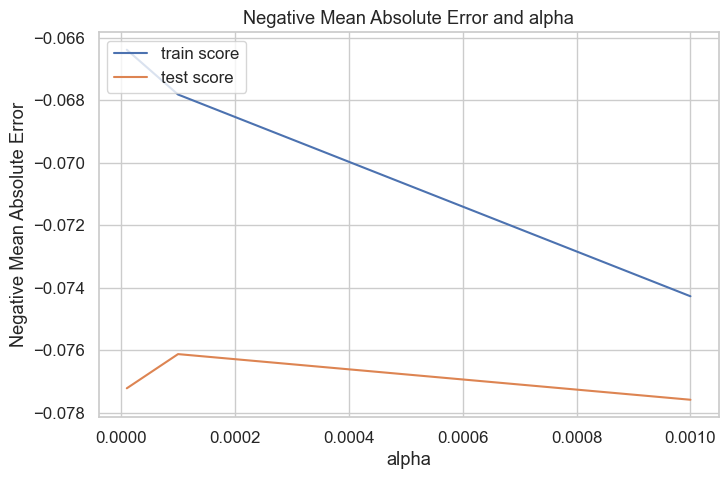

In [629]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [630]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [631]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9232202256449635
Lasso Regression test r2: 0.8937993594985859


In [632]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [633]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

Feature       Coef        mod
0   OverallQual  10.106662  10.106662
13  KitchenQual   0.806155   0.806155
1    MasVnrArea   0.512901   0.512901
29  MSZoning_RH   0.465601   0.465601
31  MSZoning_RM   0.432560   0.432560